In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

import os

if 'TravelSurvey' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'netherlands/'
destination_folder_path = data_folder + 'netherlands/'

In [2]:
filename = 'ODiN2018_Databestand_v2.0.csv'
data = pd.read_csv(source_folder_path + filename, encoding = "ISO-8859-1", sep=";")

In [3]:
data

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV
0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759
1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759
2,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009303,3,0,1,9,8,6,3,12,1,0,9901.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,15,55,8,16,0,5,2,150,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930301,1,10,0,3,8,4,11,5,15,55,16,0,5,0,0.0,0.0,13,0,0,347,347,126759
3,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009304,4,0,1,1,8,6,3,12,4,0,9902.0,1.0,3,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,10,3,8,4,5,18,30,11,18,35,5,2,#NULL!,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930401,1,10,0,3,8,4,11,5,18,30,18,35,5,

In [4]:
factor_expansion_trip = 'FactorV'
factor_expansion_person = 'FactorP'

In [5]:
data[factor_expansion_trip].sum()

19086359370

It's not possible to sum up all the expansion factor to obtain the total esstimate of the trips in the netherlands. It's simply a weight. Maybe we would have to normalize the weights based on an external estimation of the total trips to be able to say that.

### Important columns

KHvm - Principal modo de movimento da classe de transporte

- missing if no movement
- 1: Passenger car - driver
- 2: Passenger car - passenger
- 3: Train
- 4: Bus/tram/metro
- 5: Bicycle
- 6: On foot
- 7: Other


Geslacht - Gender

- 1: Man
- 2: Woman

Leeftijd - Idade

HHBestInkG - Renda disponível das famílias (grupos de 10%)

HHGestInkG - Renda disponível familiar padronizada (grupos de 10%)

RReisduur - Duração da viagem na Holanda (em minutos)

RReisduurBL - Tempo de viagem ao exterior (em minutos)

In [6]:
def calculate_distribution(df, variable_column = 'TIPVG', expansion_factor = 'FE_VIA',index_map = {}):
    df_grouped  = df.groupby(variable_column)[expansion_factor].sum()
    if index_map != {}:
        df_grouped = df_grouped[df_grouped.index.isin(list(index_map.keys()))]
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    # print(df_percentage.values.sum())
    # df_percentage = df_percentage[df_percentage.index.isin(list(index_map.keys()))]
    if index_map != {}:
        df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [7]:
mode_column = 'KHvm'
index_map = {'1': 'Passenger car - driver', '2': 'Passenger car - passenger', '3': 'Train', '4': 'Bus/tram/metro', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
df = calculate_distribution(data, mode_column, factor_expansion_trip, index_map)
df

,FactorV
KHvm,
Passenger car - driver,31.762581
Passenger car - passenger,10.894304
Train,7.353789
Bus/tram/metro,5.247778
Bicycle,26.122166
On foot,14.697099
Other,3.922284


In [8]:
31.762581 + 10.894304

42.656885

In [9]:
5.247778 + 7.353789

12.601567

In [10]:
def calculate_distribution(df, variable_column = 'TIPVG', expansion_factor = 'FE_VIA',index_map = {1: 'Coletivo', 2: 'Individual', 3: 'A pé', 4: 'Bicicleta'}):
    new_variable_column = variable_column+'_new'
    df[new_variable_column] = df[variable_column].map(index_map)
    # print(df[new_variable_column])
    df_grouped  = df.groupby(new_variable_column)[expansion_factor].sum()
    df_grouped = df_grouped[df_grouped.index.isin(list(index_map.values()))]
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    # print(df_percentage.values.sum())
    # df_percentage = df_percentage[df_percentage.index.isin(list(index_map.keys()))]
    # df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [11]:
mode_column = 'KHvm'
index_map = {'1': 'Personal motorized vehicles', '2': 'Personal motorized vehicles', '3': 'Public transportation', '4': 'Public transportation', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
df = calculate_distribution(data, mode_column, factor_expansion_trip, index_map)
df

,FactorV
KHvm_new,
Bicycle,26.122166
On foot,14.697099
Other,3.922284
Personal motorized vehicles,42.656885
Public transportation,12.601567


In [12]:
data['Hvm'].value_counts(normalize=True)

1         0.406171
8         0.227087
9         0.132525
2         0.077654
#NULL!    0.041585
7         0.034128
3         0.028278
11        0.013952
5         0.011780
4         0.008554
18        0.004087
17        0.002510
16        0.002080
12        0.002074
14        0.001941
19        0.001767
10        0.001035
21        0.000953
23        0.000543
24        0.000400
15        0.000277
13        0.000200
22        0.000195
20        0.000184
6         0.000041
Name: Hvm, dtype: float64

In [13]:
mode_column = 'KHvm'
index_map = {'1': 'Personal motorized vehicles', '2': 'Personal motorized vehicles', '3': 'Public transportation', '4': 'Public transportation', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
df = calculate_distribution(data, mode_column, factor_expansion_trip, index_map)
df

,FactorV
KHvm_new,
Bicycle,26.122166
On foot,14.697099
Other,3.922284
Personal motorized vehicles,42.656885
Public transportation,12.601567


In [14]:
data[mode_column]

0         1
1         1
2         5
3         5
4         1
         ..
195233    4
195234    4
195235    2
195236    2
195237    2
Name: KHvm, Length: 195238, dtype: object

In [15]:
data[mode_column].unique()

array(['1', '5', '6', '#NULL!', '4', '2', '3', '7'], dtype=object)

In [16]:
index_map = {'1': 'Personal motorized vehicles', '2': 'Personal motorized vehicles', '3': 'Public transportation', '4': 'Public transportation', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}

In [17]:
data[mode_column].map(index_map)

0         Personal motorized vehicles
1         Personal motorized vehicles
2                             Bicycle
3                             Bicycle
4         Personal motorized vehicles
                     ...             
195233          Public transportation
195234          Public transportation
195235    Personal motorized vehicles
195236    Personal motorized vehicles
195237    Personal motorized vehicles
Name: KHvm, Length: 195238, dtype: object

In [18]:
data[mode_column].value_counts(normalize=True)

1         0.303056
5         0.261255
6         0.132525
2         0.103115
3         0.077654
4         0.048612
#NULL!    0.041585
7         0.032197
Name: KHvm, dtype: float64

In [19]:
gender_column = 'Geslacht'
data[gender_column].unique()

array([1, 2])

In [20]:
gender_column = 'Geslacht'
gender_index_map = {1: 'Man', 2: 'Woman'}
calculate_distribution(data, gender_column, factor_expansion_trip, gender_index_map)

,FactorV
Geslacht_new,
Man,47.895491
Woman,52.104509


In [21]:
gender_column = 'Geslacht'
gender_index_map = {1: 'Man', 2: 'Woman'}
calculate_distribution(data, gender_column, factor_expansion_person, gender_index_map)

,FactorP
Geslacht_new,
Man,47.895662
Woman,52.104338


In [22]:
bike_trips = data[data[mode_column] == '5']

In [23]:
len(bike_trips)

51007

In [24]:
index_map
calculate_distribution(bike_trips, gender_column, factor_expansion_person, gender_index_map)

,FactorP
Geslacht_new,
Man,44.958221
Woman,55.041779


In [25]:
index_map
calculate_distribution(bike_trips, gender_column, factor_expansion_trip, gender_index_map)

,FactorV
Geslacht_new,
Man,44.957707
Woman,55.042293


## Age

In [26]:
age_column = 'Leeftijd'

<AxesSubplot:ylabel='Frequency'>

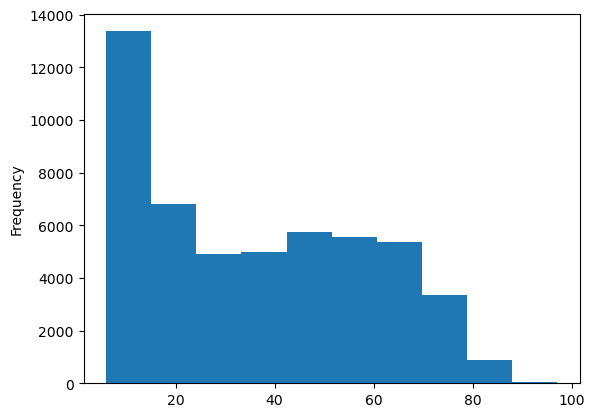

In [27]:
bike_trips[age_column].plot(kind='hist')


In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_histogram_age_with_expansion_factor(trips, variable_column = 'IDADE', expansion_factor = 'FE_VIA', list_bins = [0,15,25,35,45,55,65,75,100], mode = 'bike', expand = True, save = False):
    fig, ax = plt.subplots(figsize=(22, 11))

    if expand:
        sns.histplot(data = trips, x = variable_column, stat = 'percent', bins = list_bins, weights = expansion_factor)
    else:
        ax = sns.histplot(data = trips, x = variable_column, stat = 'percent', bins = list_bins)
    
    for i in ax.containers:
        ax.bar_label(i,fmt='%.1f', fontsize=25)
    
    ax.set_xticks(list_bins)

    # ax.set_ylim(bottom = 0, top = 35)

    ax.axes.set_title('Age distribution for ' + mode, fontsize=30, pad = 15)
    ax.set_xlabel('Age (years)',fontsize=25, labelpad = 15)
    ax.set_ylabel('Percentage of trips (%)',fontsize=25, labelpad = 15)
    ax.set_yticklabels(ax.get_yticks(), size=25)
    ax.set_xticklabels(ax.get_xticks(), size=25)

    plt.show()

    if save:
        ax.figure.savefig(destination_folder_path + 'charts/histograms/' + variable_column + expansion_factor, bbox_inches='tight')

In [29]:
if 'olá':
    print('oi')

oi


In [30]:

# list_bins = [0,10,20,25,35,45,55,65,75,90]
# list_bins = [0,15,20,25,35,45,55,65,75,100]
# list_bins = list(range(0,90,5))
# list_bins = [0,15,25,35,45,55,65,75,100]

# limit_bins= 100+1
# step = 10
# list_bins = list(range(0,limit_bins,step))

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


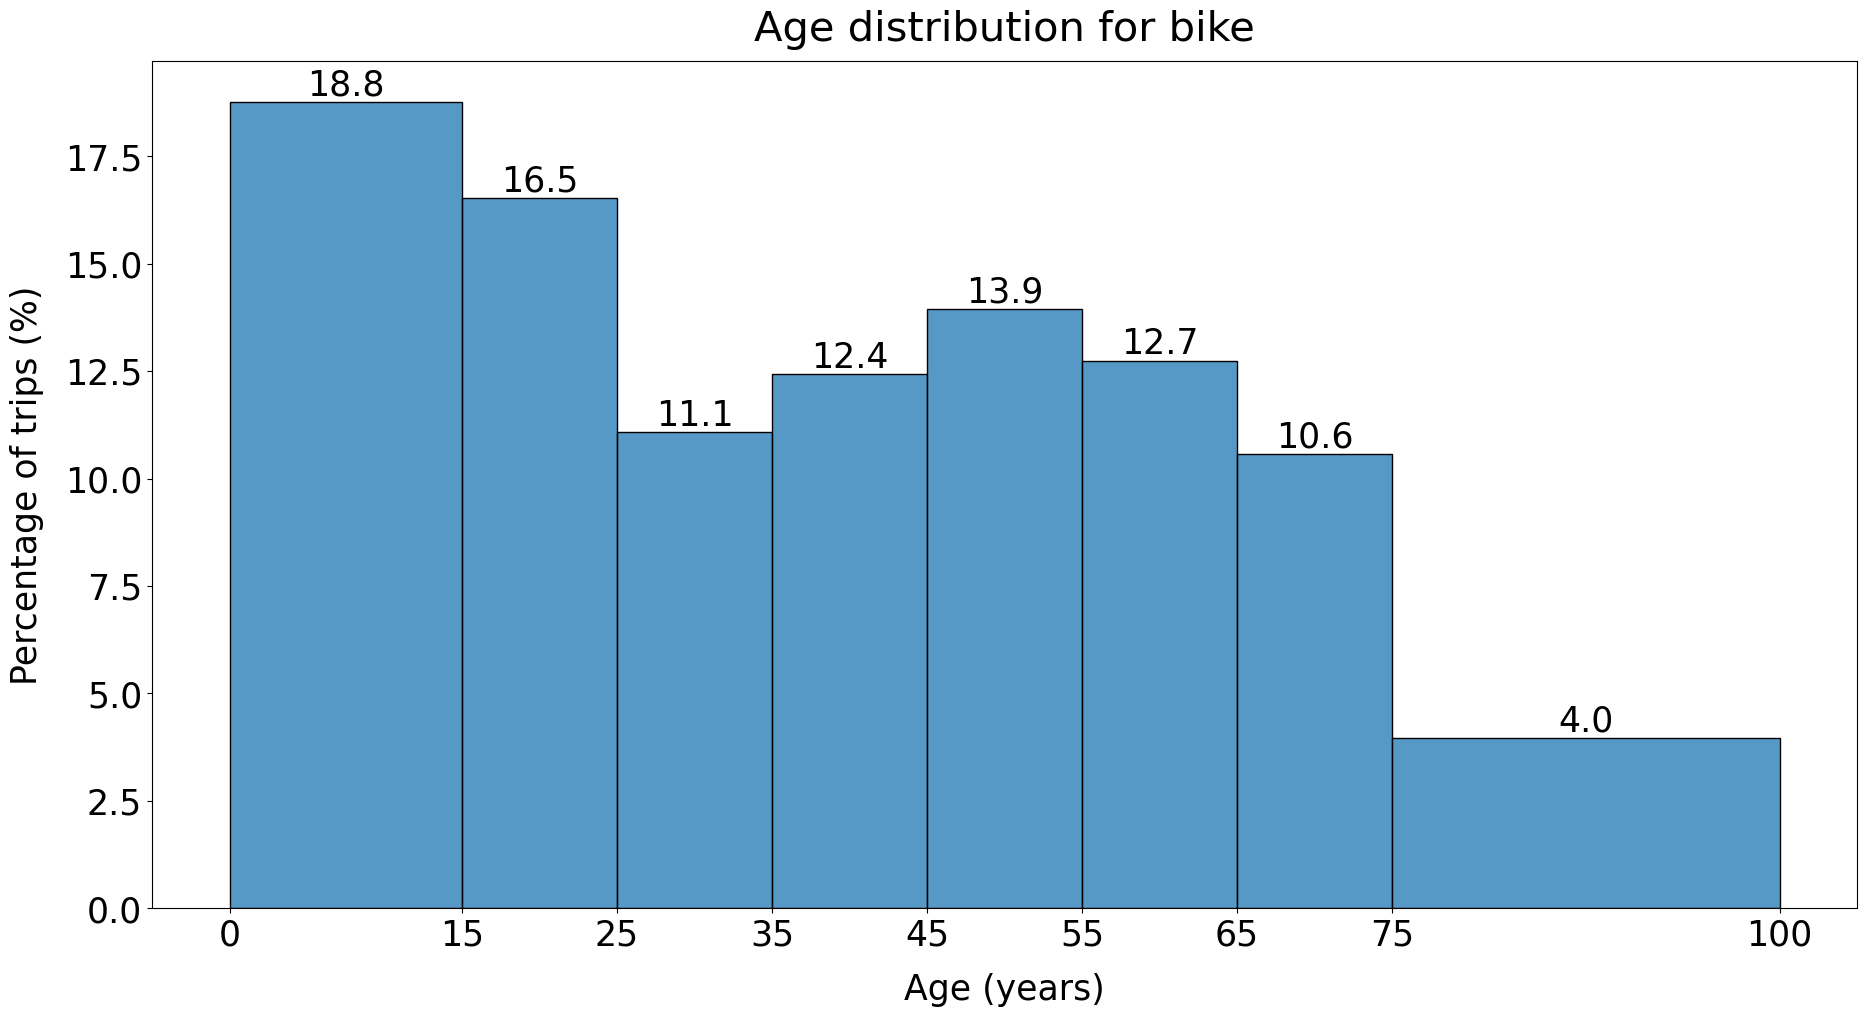

In [31]:
list_bins = [0,15,25,35,45,55,65,75,100]
plot_histogram_age_with_expansion_factor(bike_trips, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'bike', save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


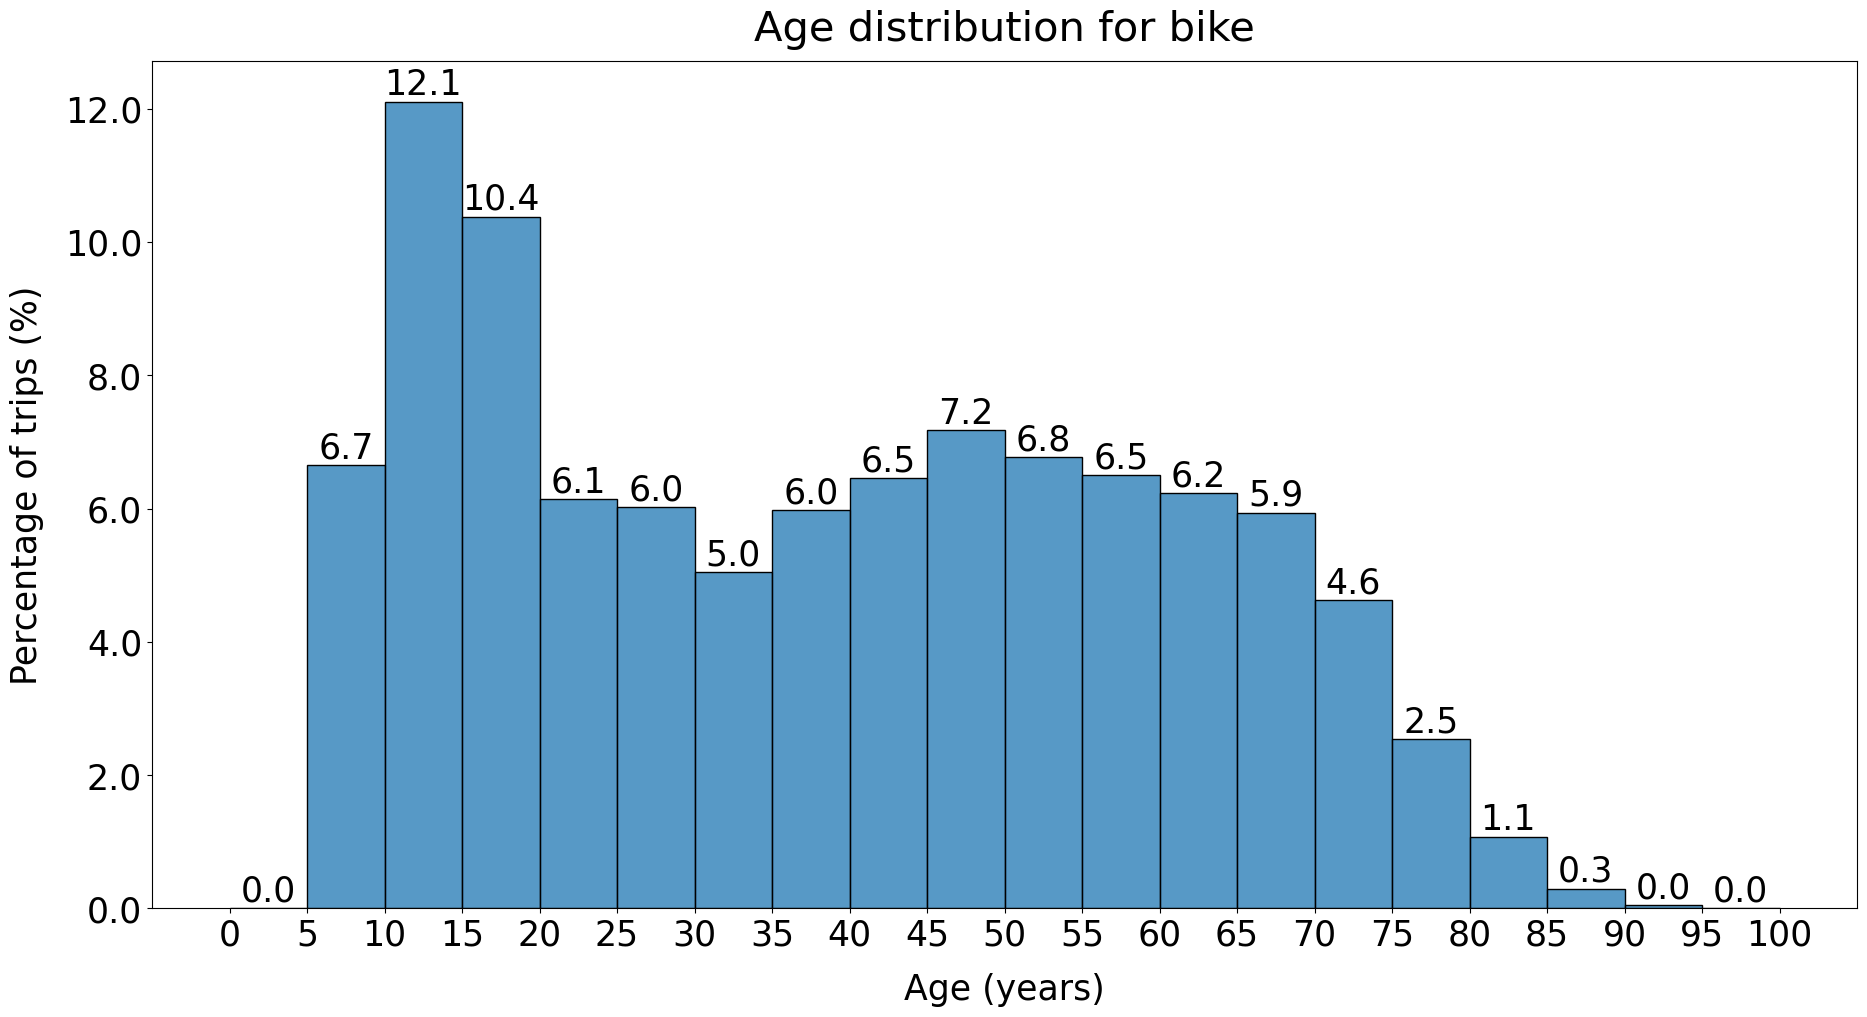

In [32]:
limit_bins= 100+1
step = 5
list_bins = list(range(0,limit_bins,step))
plot_histogram_age_with_expansion_factor(bike_trips, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'bike', save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


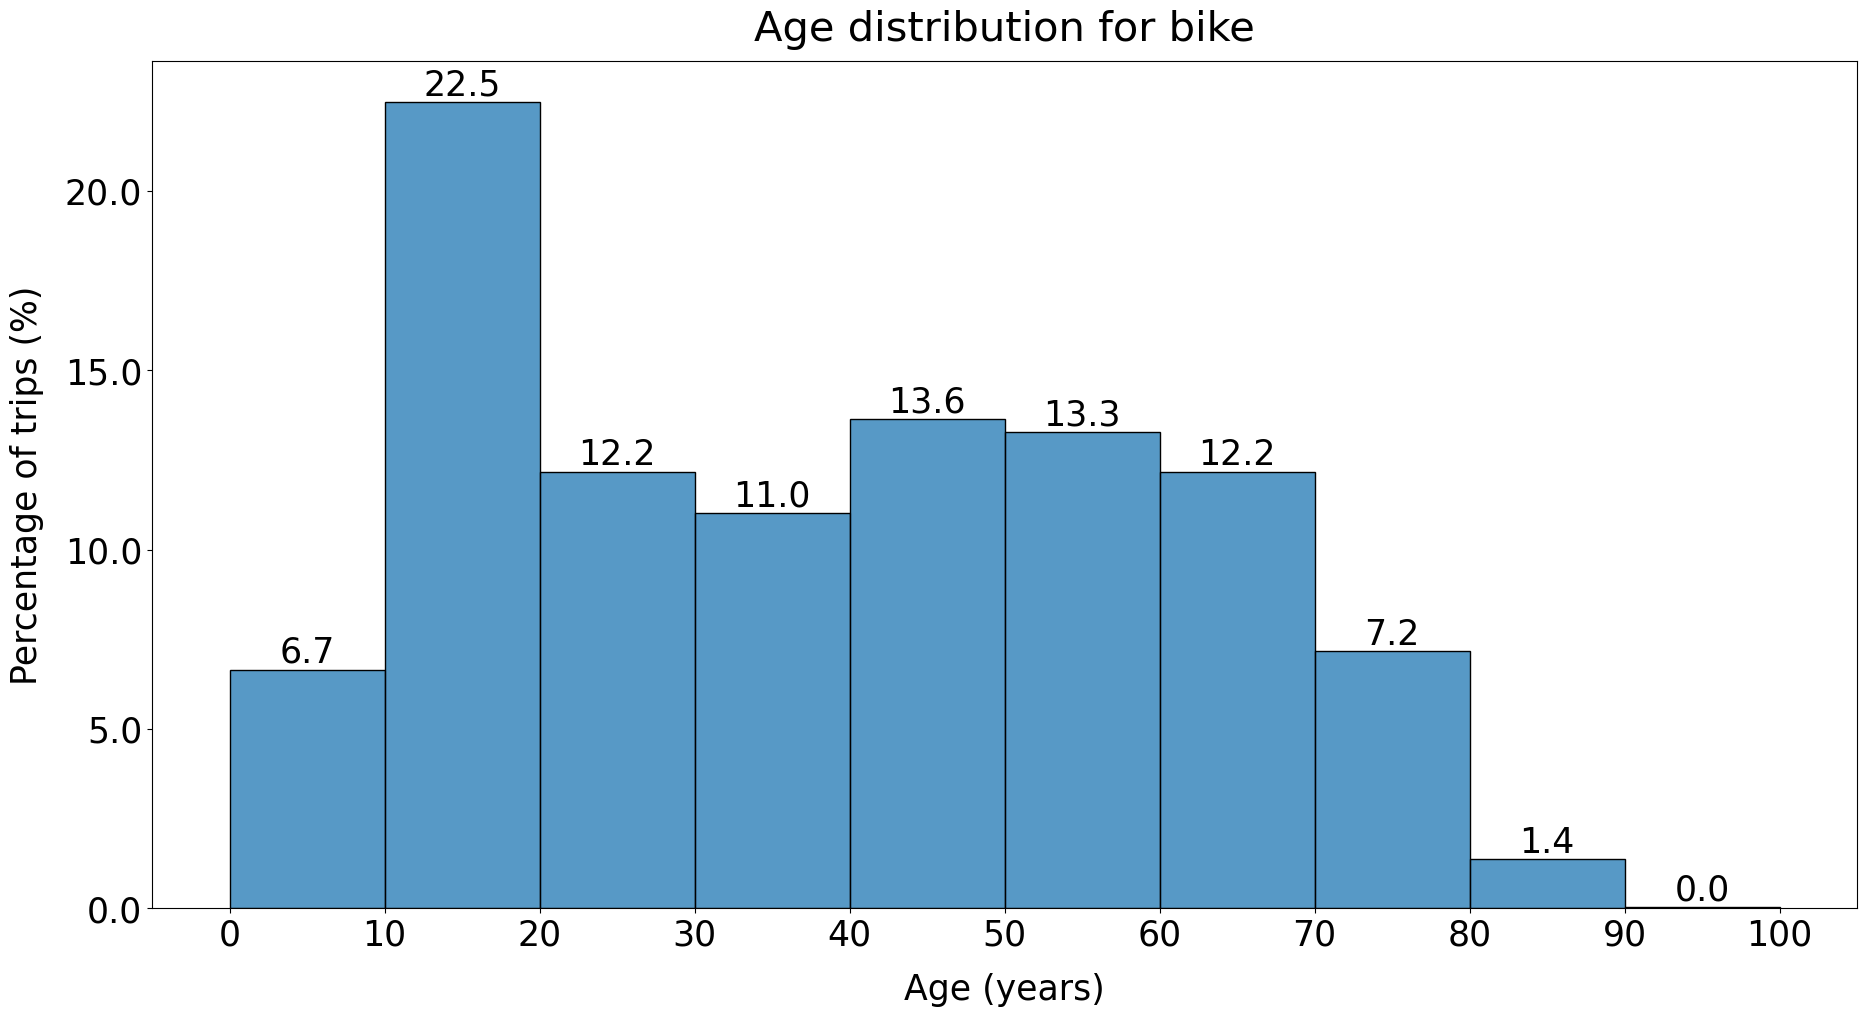

In [33]:
limit_bins= 100+1
step = 10
list_bins = list(range(0,limit_bins,step))
plot_histogram_age_with_expansion_factor(bike_trips, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'bike', save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


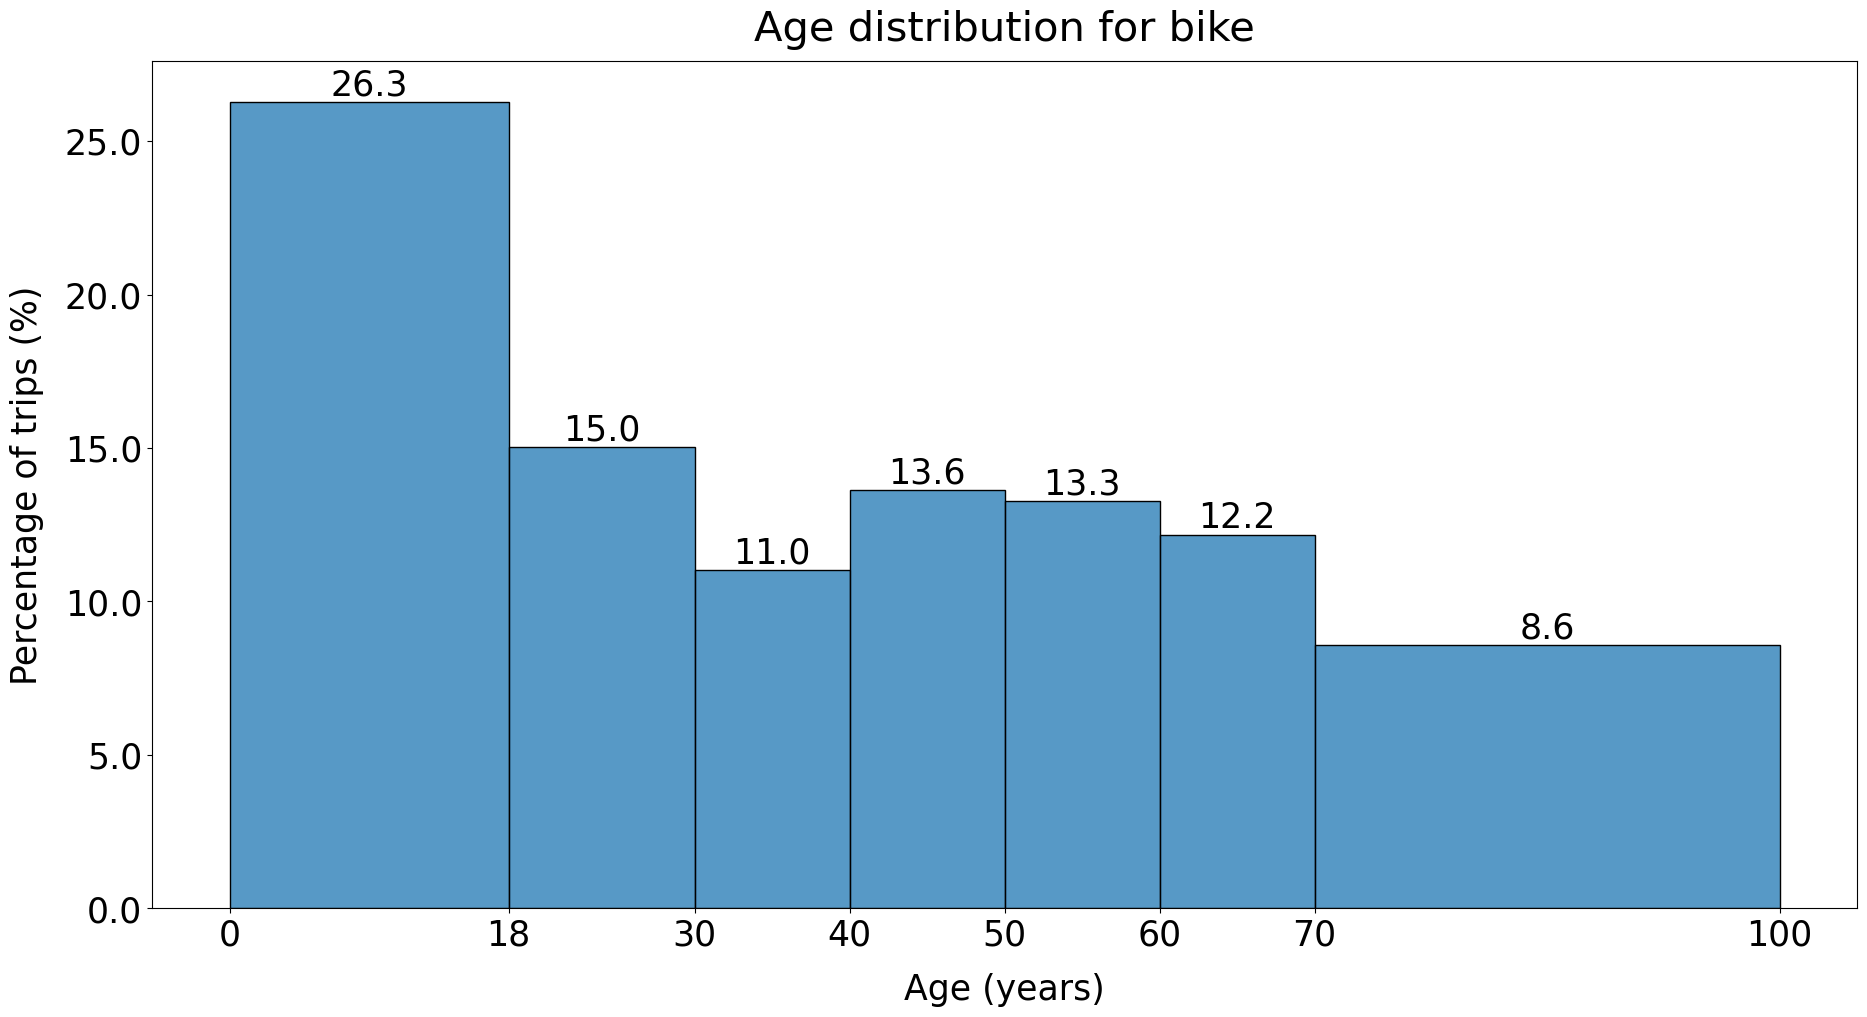

In [34]:
list_bins = [0,18,30,40,50,60,70,100]
plot_histogram_age_with_expansion_factor(bike_trips, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'bike', save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


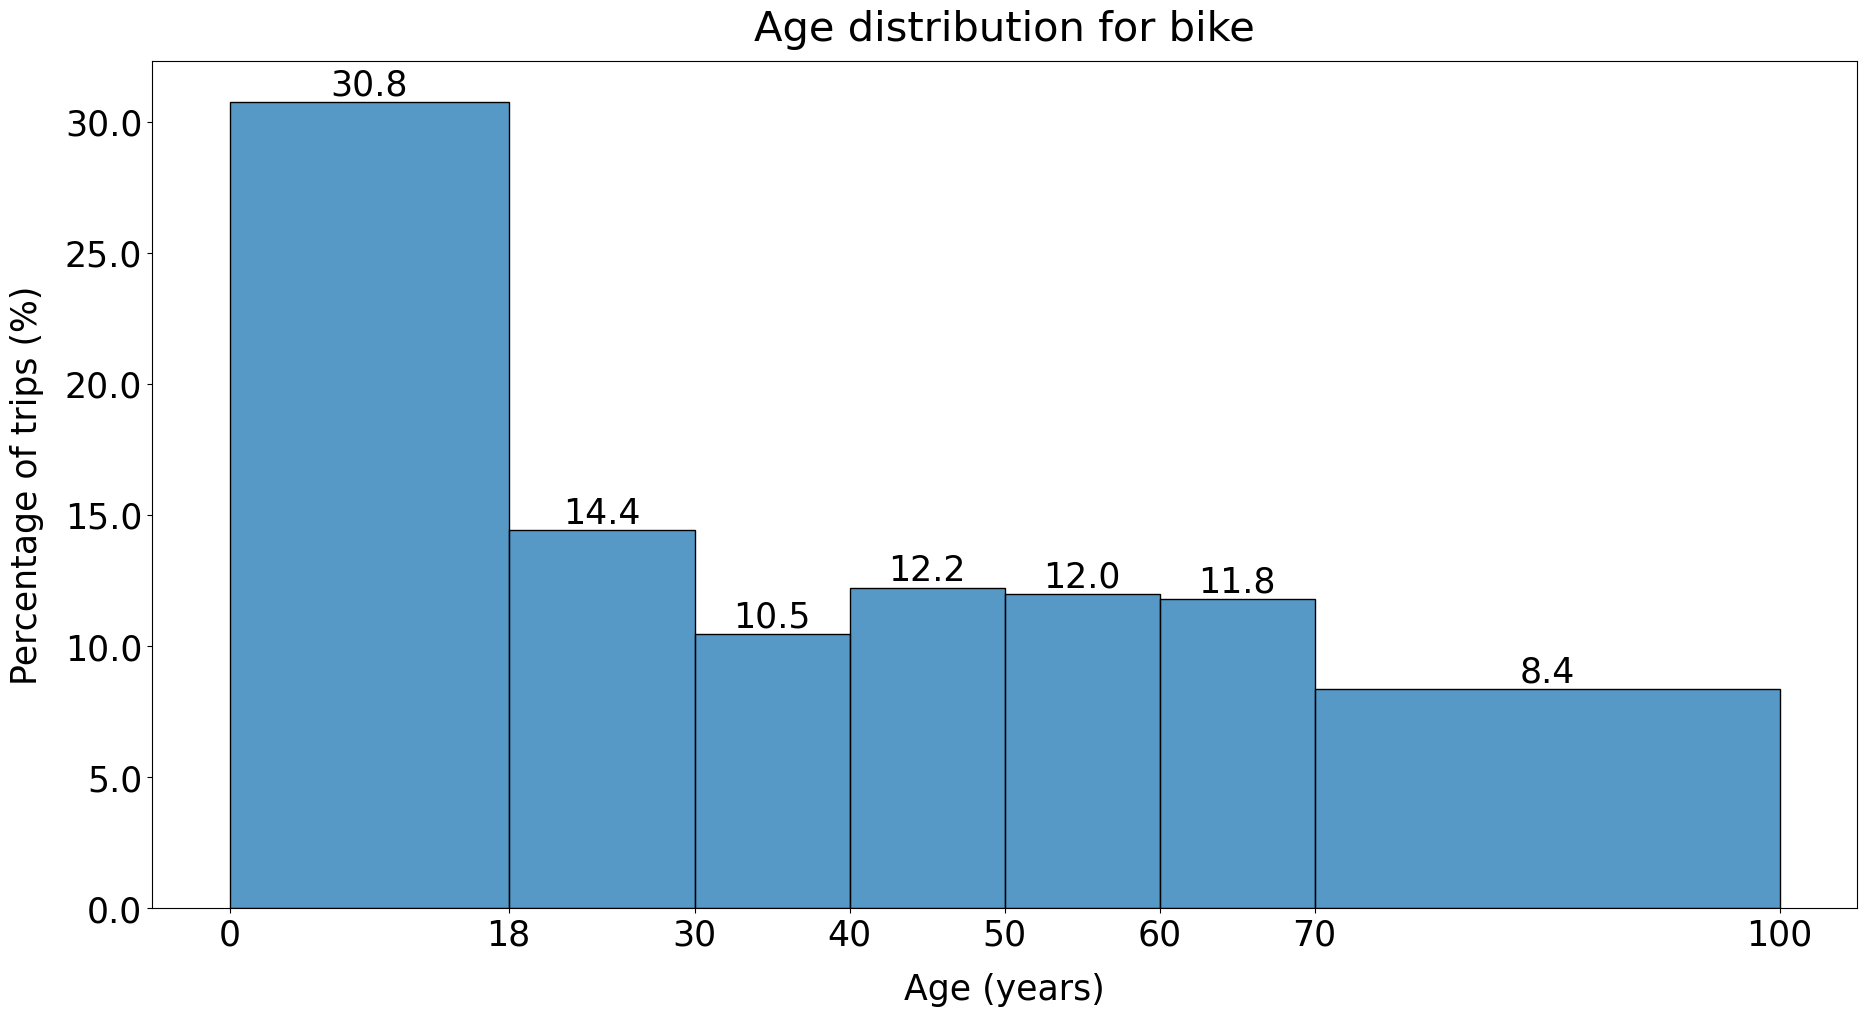

In [35]:
list_bins = [0,18,30,40,50,60,70,100]
plot_histogram_age_with_expansion_factor(bike_trips, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'bike', expand = False, save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


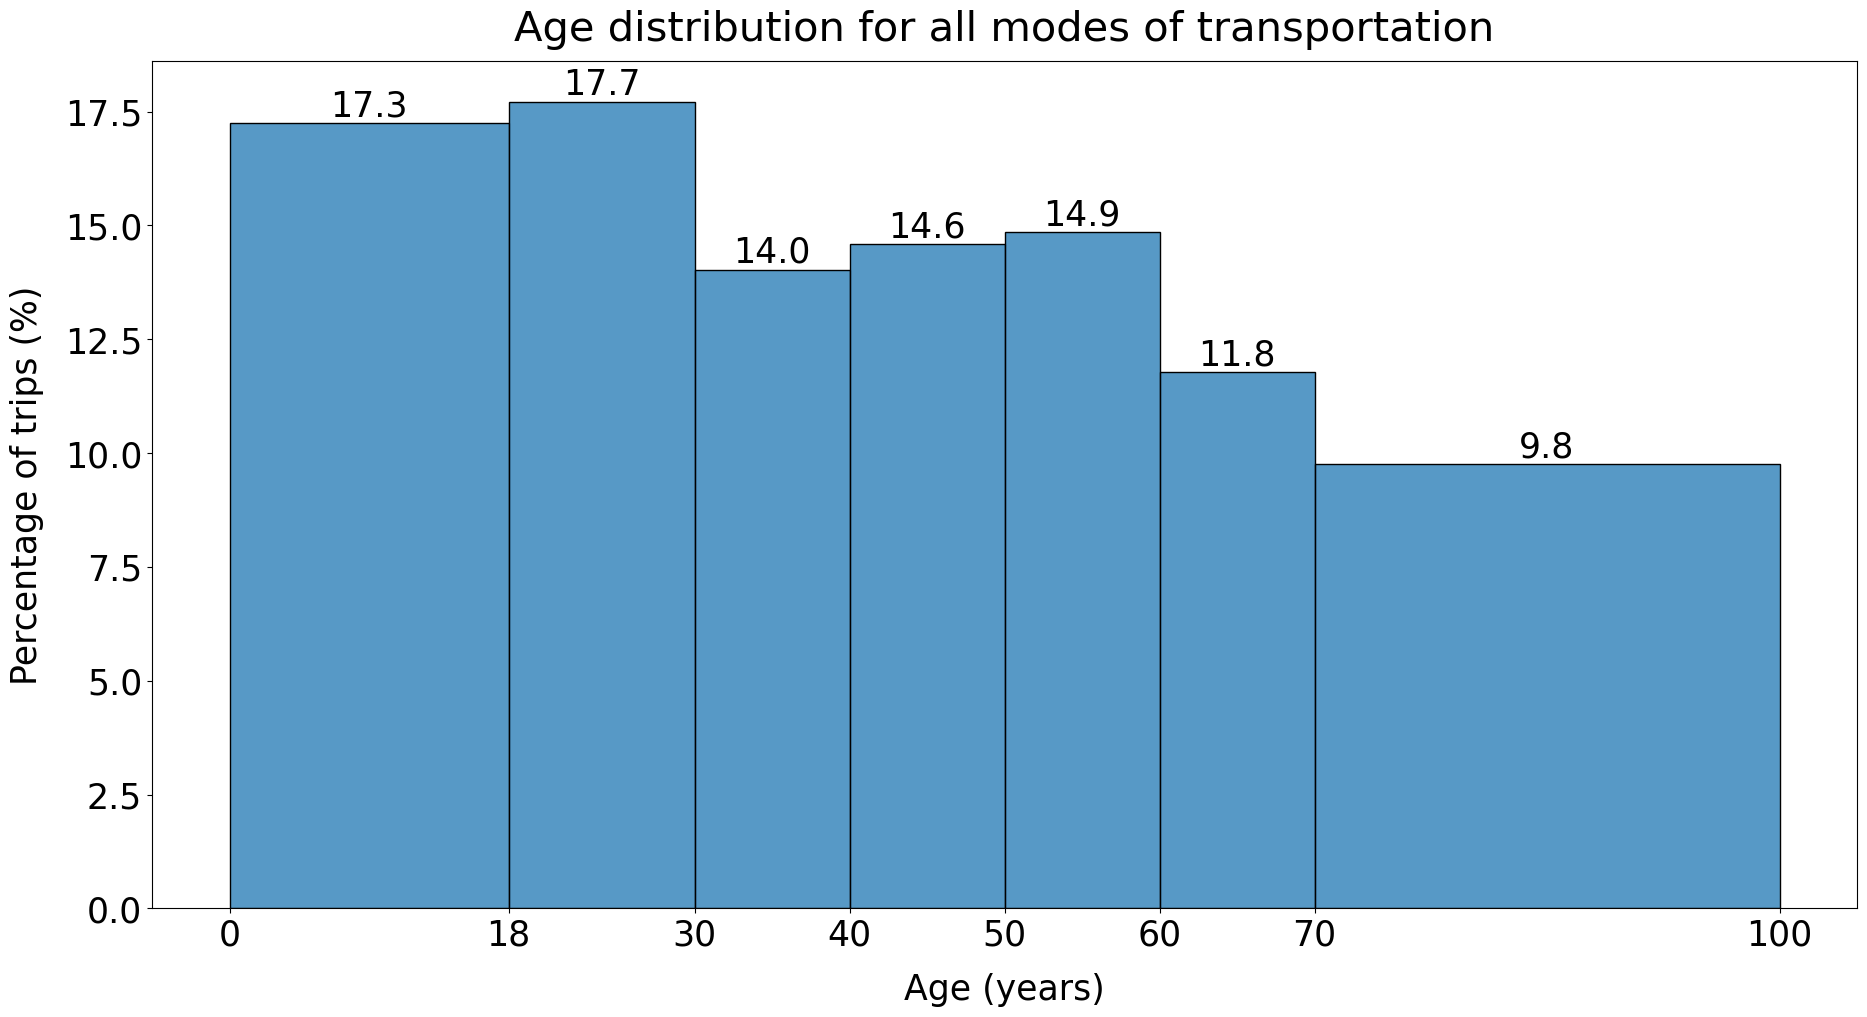

In [36]:
# plot_histogram_age(data_sp, mode = 'all modes of transportation')
list_bins = [0,18,30,40,50,60,70,100]
plot_histogram_age_with_expansion_factor(data, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'all modes of transportation', expand = False, save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


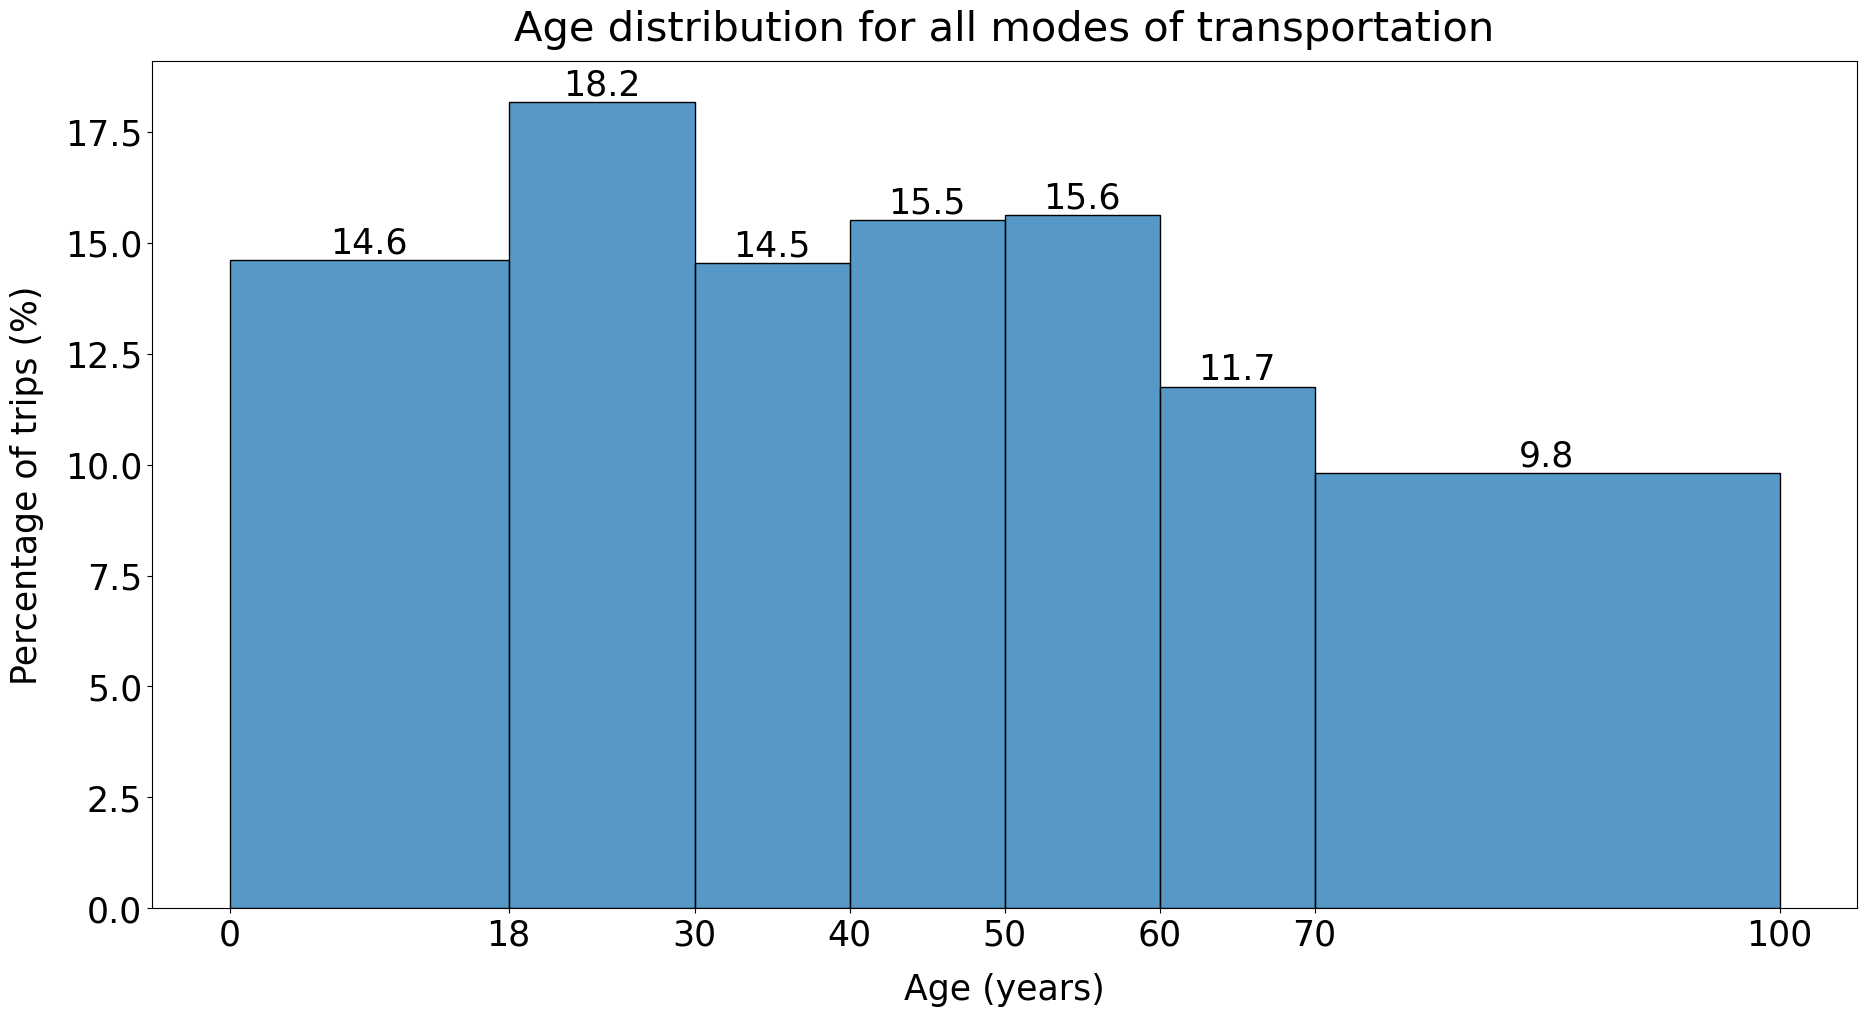

In [37]:
# plot_histogram_age(data_sp, mode = 'all modes of transportation')
list_bins = [0,18,30,40,50,60,70,100]
plot_histogram_age_with_expansion_factor(data, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'all modes of transportation', expand = True, save=True)

In [38]:
public_trips = data[(data[mode_column] == '3') | (data[mode_column] == '4')]
individual_trips = data[(data[mode_column] == '1') | (data[mode_column] == '2')]
walk_trips = data[data[mode_column] == '6']

In [39]:
individual_trips

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new
0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized vehicles,Man
1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized vehicles,Man
4,1,55834100279,1,1,2,2,3,0,0,0,2,9902,3,3,3,1,2,0,18,1,42,10,1,0,4,6,3,3,2,8,8,2,1,0,2,1,0,1,1,0,1,1,0,0,2002,1,1,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,5,5,4,4,1,5,5,4,2018,1,2,12,6,0,1,0,0,0,0,3,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,40,70,0,1,5583410027901,1,0,1,8,7,4,0,12,1,0,9902.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,30,4,1,1,1,9,0,5,9,10,10,3,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341002790101,1,30,0,4,1,1,2,1,9,0,9,10,10,0,0.0,0.0,13,0,0,142,284,103762,Personal motorized vehicles,Man
5,0,55834100279,1,1,2,2,3,0,0,0,2,9902,3,3,3,1,2,0,18,1,42,10,1,0,4,6,3,3,2,8,8,2,1,0,2,1,0,1,1,0,1,1,0,0,2002,1,1,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,5,5,4,4,1,5,5,4,2018,1,2,12,6,0,1,0,0,0,0,3,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,40,70,0,1,5583410027902,2,0,1,1,7,4,3,12,4,0,9902.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,30,4,1,1,1,9,40,5,9,50,10,3,220,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NU

In [40]:
data[(data[mode_column].isin(['1', '2']))]

,OP,OPID,Steekproef,Mode,HHPers,HHSam,HHPlOP,HHLft1,HHLft2,HHLft3,HHLft4,WoPC,WoGem,Sted,GemGr,Prov,Corop,BuurtAdam,MRA,Geslacht,Leeftijd,KLeeft,Herkomst,BetWerk,OnbBez,MaatsPart,Opleiding,HHBestInkG,HHGestInkG,HHLaagInk,HHSocInk,HHWelvG,HHRijbewijsAu,HHRijbewijsMo,HHRijbewijsBr,OPRijbewijsAu,OPRijbewijsMo,OPRijbewijsBr,HHAuto,HHAutoL,OPAuto,BrandstofPa1,XBrandstofPa1,BrandstofEPa1,BouwjaarPa1,KBouwjaarPa1,KGewichtPa1,TenaamPa1,BrandstofPa2,XBrandstofPa2,BrandstofEPa2,BouwjaarPa2,KBouwjaarPa2,KGewichtPa2,TenaamPa2,BrandstofPaL,XBrandstofPaL,BrandstofEPaL,BouwjaarPaL,KBouwjaarPaL,KGewichtPaL,HHMotor,OPMotor,HHBrom,OPBrom,HHSnor,OPSnor,HHEFiets,HHBezitVm,OPBezitVm,FqNEFiets,FqEFiets,FqBTM,FqTrein,FqAutoB,FqAutoP,FqBrSnor,OVStKaart,Jaar,Maand,Week,Dag,Weekdag,Feestdag,Weggeweest,RedenNW,RedenNWZ,RedenNWW,RedenNWB,AantVpl,AantOVVpl,AantSVpl,EFiets,AutoEig,AutoHhL,AutoLWg,AutoLPl,AutoBed,AutoDOrg,AutoDPart,AutoDBek,AutoLeen,AutoHuur,AutoAnd,ByzDag,ByzAdr,ByzVvm,ByzTyd,ByzDuur,ByzRoute,ByzReden,ReisduurOP,AfstandOP,AfstandSOP,Verpl,VerplID,VerplNr,Toer,AantRit,Doel,MotiefV,KMotiefV,MeerWink,AardWerk,VertLoc,VertGeb,VertPC,VertPCBL,VertGem,VertProv,VertCorop,VertMRA,AankGeb,AankPC,AankPCBL,AankGem,AankProv,AankCorop,AankMRA,PCG,GemG,PCBLG,AfstV,KAfstV,Hvm,HvmRol,KHvm,VertUur,VertMin,KVertTijd,AankUur,AankMin,Reisduur,KReisduur,ActDuur,Kind6,VolgWerk,SAantAdr,SDezPlts,SPlaats1,SPlaats2,SPlaats3,SPlaats4,SPlaats5,AfstS,AfstSBL,SVvm1,SVvm2,SVvm3,SVvm4,SBegUur,SBegMin,SEindUur,SEindMin,CorrVerpl,GehBLVer,Rit,RitID,RitNr,AfstR,AfstRBL,KAfstR,Rvm,RvmRol,RAantIn,KRvm,RVertUur,RVertMin,RAankUur,RAankMin,RReisduur,RReisduurBL,RVertStat,RAankStat,RTSamen,RCorrSnelh,RVliegVer,FactorH,FactorP,FactorV,KHvm_new,Geslacht_new
0,1,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009301,1,0,1,8,7,4,1,12,1,0,9901.0,1.0,3,1,2,18,0,9933.0,1.0,10,1,2,18,0.0,0,0.0,60,6,1,1,1,10,30,5,10,45,15,4,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930101,1,60,0,6,1,1,1,1,10,30,10,45,15,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized vehicles,Man
1,0,55834100093,1,1,1,1,1,0,0,0,1,9901,3,3,3,1,2,0,18,1,42,10,1,3,0,2,3,8,7,8,9,7,1,0,1,1,0,1,1,0,1,1,0,0,2006,1,3,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,3,5,5,5,1,4,5,4,2018,1,2,13,7,0,1,0,0,0,0,4,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,35,140,0,1,5583410009302,2,0,1,1,7,4,3,12,4,0,9933.0,1.0,10,1,2,18,0,9901.0,1.0,3,1,2,18,0.0,0,0.0,60,6,1,1,1,11,15,5,11,25,10,3,270,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341000930201,1,60,0,6,1,1,1,1,11,15,11,25,10,0,0.0,0.0,13,0,0,347,347,126759,Personal motorized vehicles,Man
4,1,55834100279,1,1,2,2,3,0,0,0,2,9902,3,3,3,1,2,0,18,1,42,10,1,0,4,6,3,3,2,8,8,2,1,0,2,1,0,1,1,0,1,1,0,0,2002,1,1,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,5,5,4,4,1,5,5,4,2018,1,2,12,6,0,1,0,0,0,0,3,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,40,70,0,1,5583410027901,1,0,1,8,7,4,0,12,1,0,9902.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,30,4,1,1,1,9,0,5,9,10,10,3,30,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,0,1,558341002790101,1,30,0,4,1,1,2,1,9,0,9,10,10,0,0.0,0.0,13,0,0,142,284,103762,Personal motorized vehicles,Man
5,0,55834100279,1,1,2,2,3,0,0,0,2,9902,3,3,3,1,2,0,18,1,42,10,1,0,4,6,3,3,2,8,8,2,1,0,2,1,0,1,1,0,1,1,0,0,2002,1,1,1,7,7,6,9995,9,7,3,7,7,6,9995,9,7,0,0,0,0,0,0,0,3,3,5,5,4,4,1,5,5,4,2018,1,2,12,6,0,1,0,0,0,0,3,0,0,5,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,11,40,70,0,1,5583410027902,2,0,1,1,7,4,3,12,4,0,9902.0,1.0,3,1,2,18,0,9902.0,1.0,3,1,2,18,0.0,0,0.0,30,4,1,1,1,9,40,5,9,50,10,3,220,0,9,#NULL!,#NULL!,NaN,NaN,NaN,NaN,NaN,#NULL!,#NULL!,#NU

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


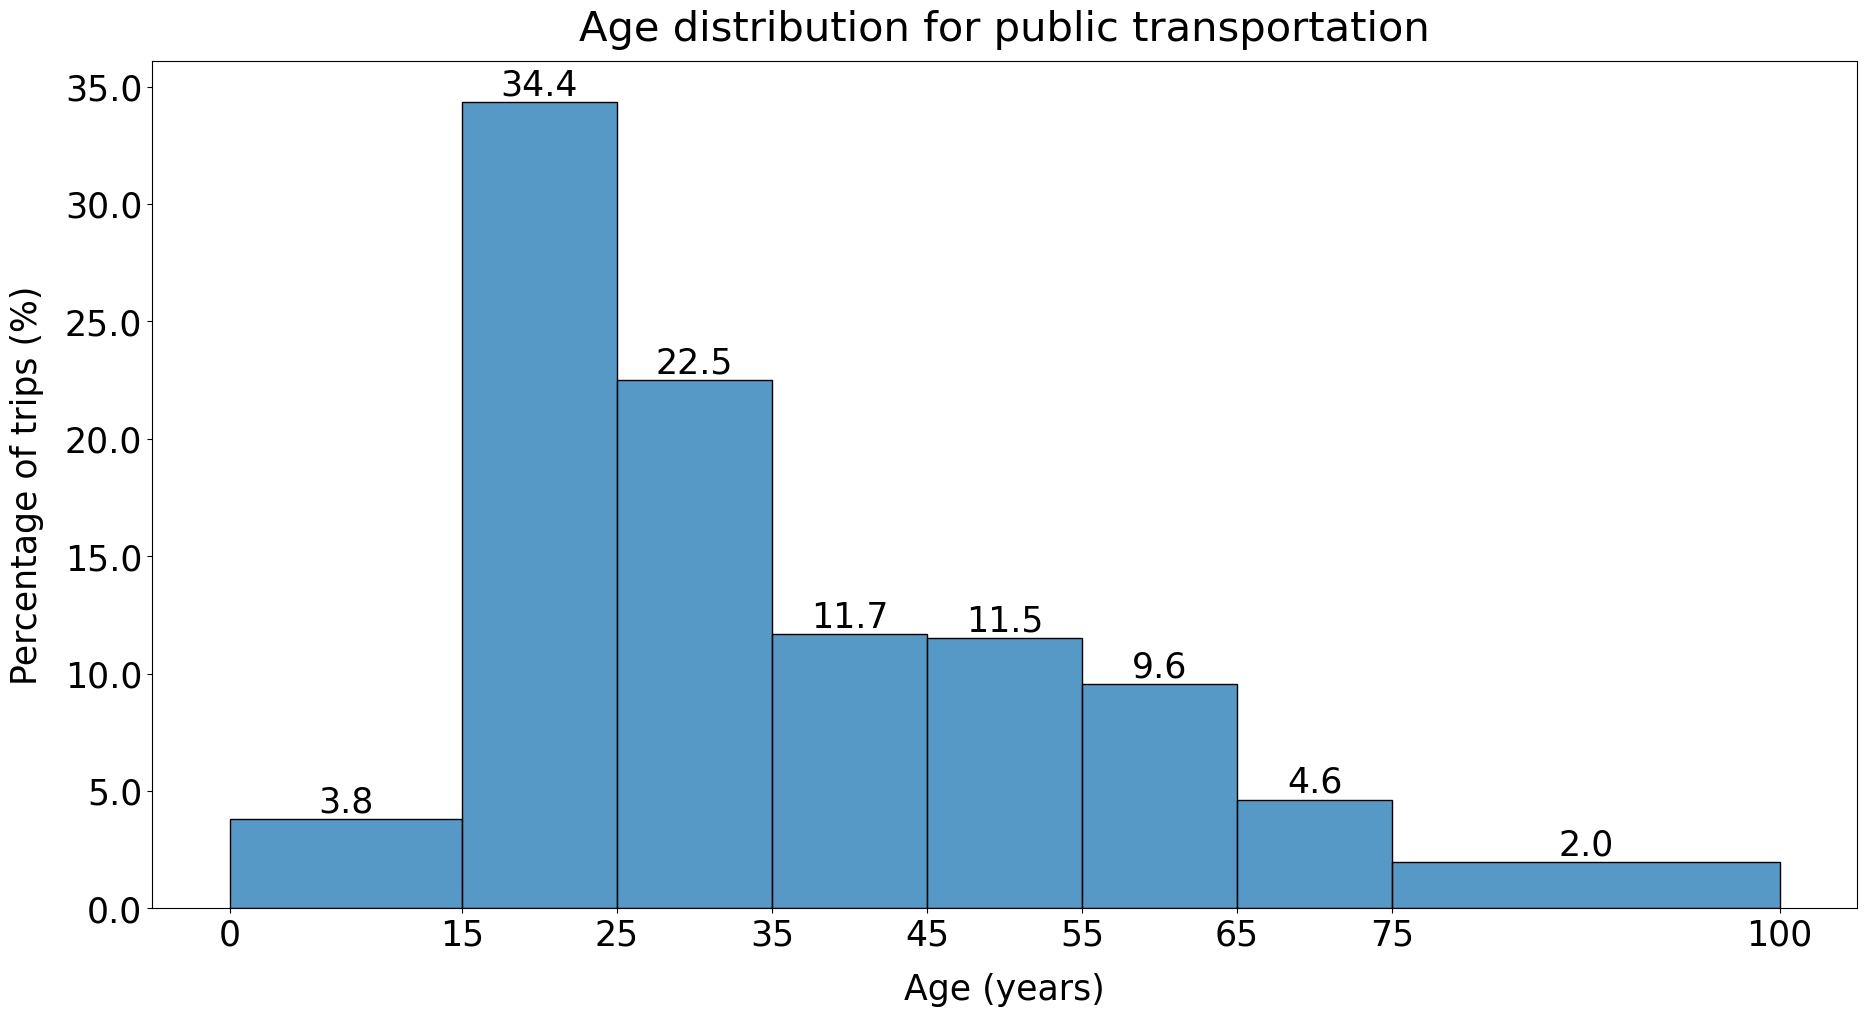

In [41]:
list_bins = [0,15,25,35,45,55,65,75,100]
plot_histogram_age_with_expansion_factor(public_trips, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'public transportation', save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


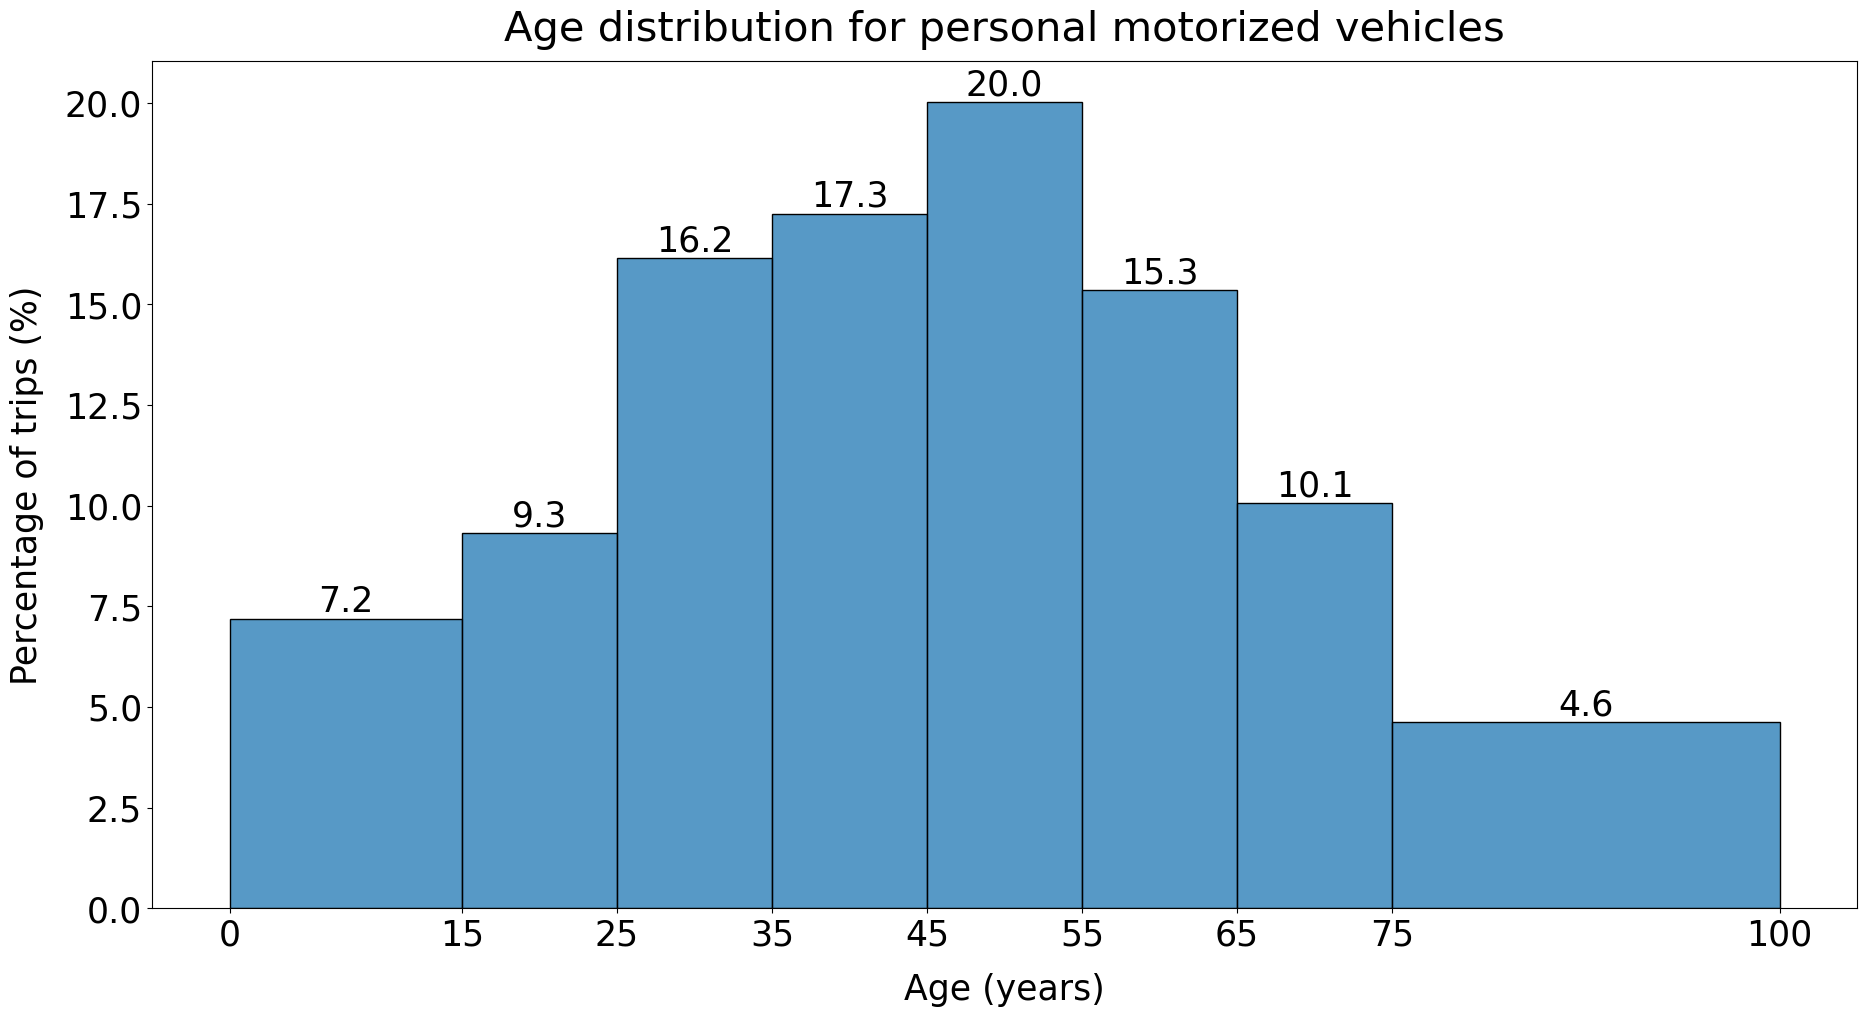

In [42]:
list_bins = [0,15,25,35,45,55,65,75,100]
plot_histogram_age_with_expansion_factor(individual_trips, variable_column = age_column,
                                         expansion_factor = factor_expansion_trip, list_bins = list_bins,
                                         mode = 'personal motorized vehicles', save=True)

/tmp/ipykernel_4735/618786591.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


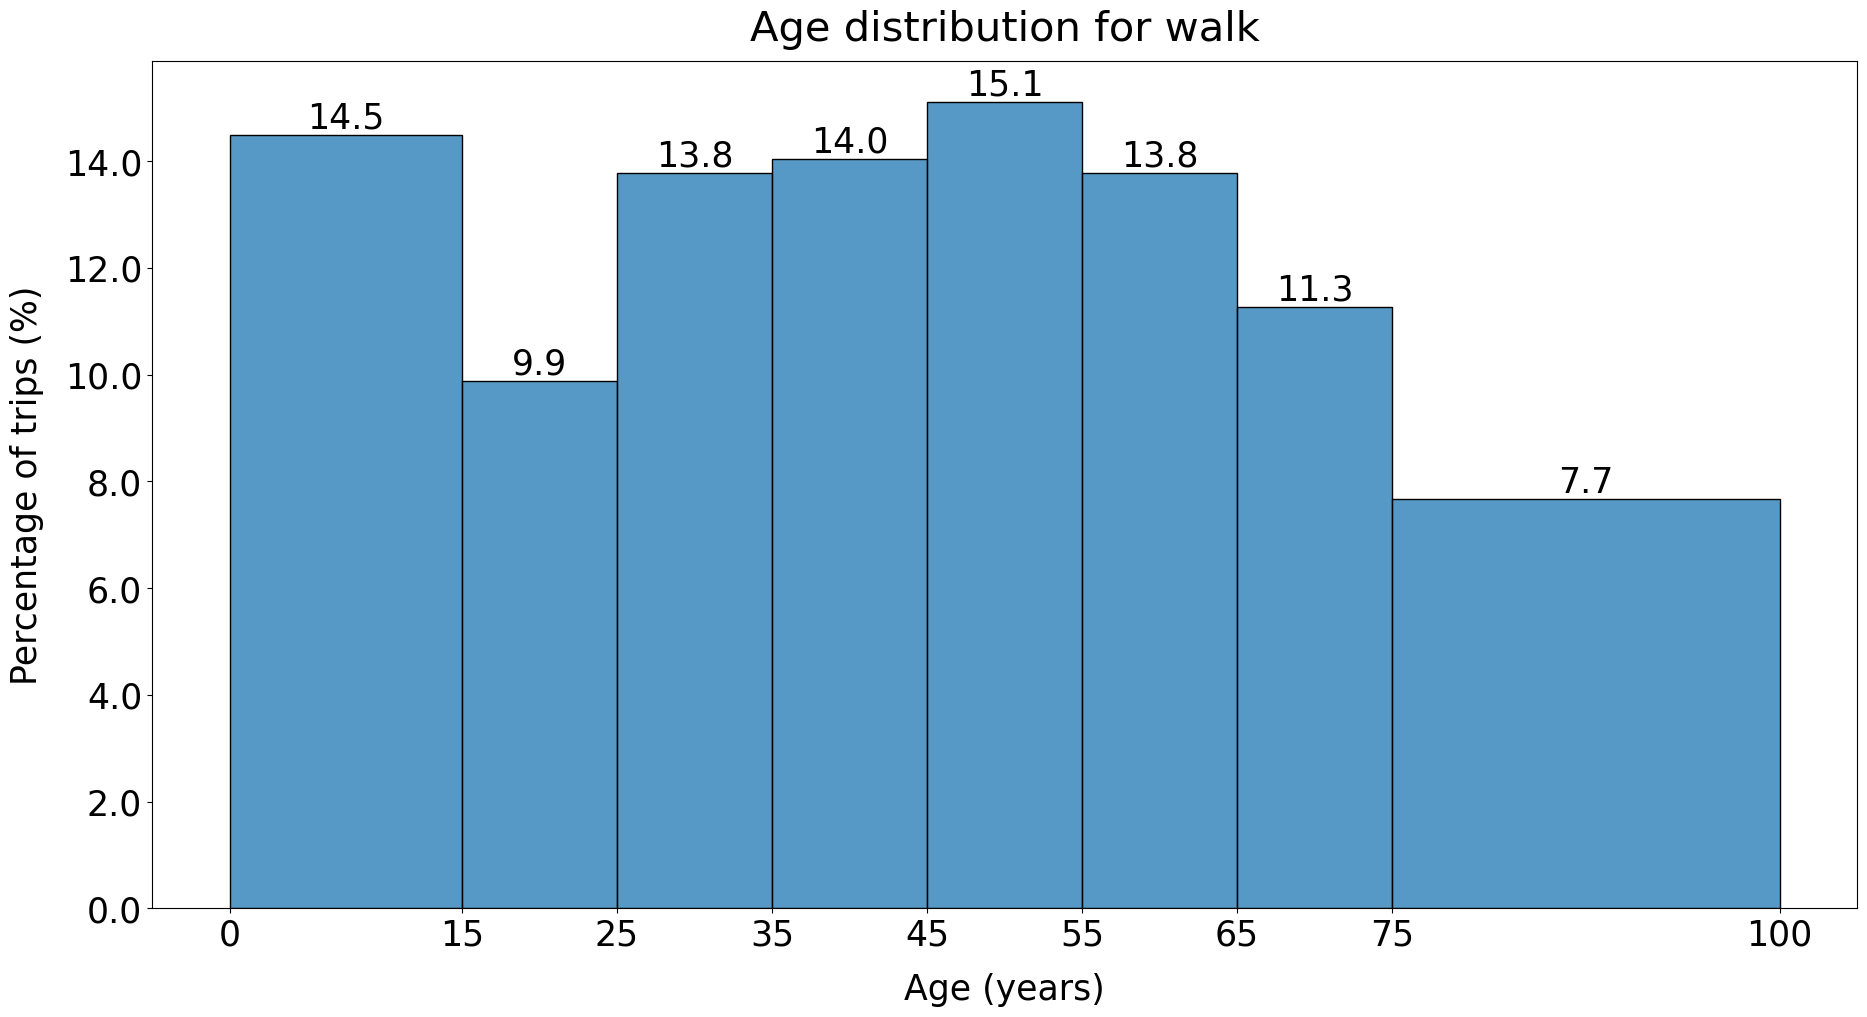

In [43]:
list_bins = [0,15,25,35,45,55,65,75,100]
plot_histogram_age_with_expansion_factor(walk_trips, variable_column = age_column, expansion_factor = factor_expansion_trip, list_bins = list_bins, mode = 'walk', save=True)

## Social class

columns:
- HHBestInkG - Renda disponível das famílias (grupos de 10%)

- HHGestInkG - Renda disponível familiar padronizada (grupos de 10%)

In [44]:
data['HHBestInkG'].unique()

array([ 8,  3, 10,  5,  6,  1,  2,  7,  9, 11,  4])

In [45]:
# def calculate_distribution(df, variable_column = 'TIPVG', expansion_factor = 'FE_VIA',index_map = {}):
#     df_grouped  = df.groupby(variable_column)[expansion_factor].sum()
#     if index_map != {}:
#         df_grouped = df_grouped[df_grouped.index.isin(list(index_map.keys()))]
#     df_percentage = df_grouped / df_grouped.sum() * 100
#     df_percentage = pd.DataFrame(df_percentage)
#     # print(df_percentage.values.sum())
#     # df_percentage = df_percentage[df_percentage.index.isin(list(index_map.keys()))]
#     if index_map != {}:
#         df_percentage.index = df_percentage.index.map(index_map)
#     return df_percentage

In [48]:
income_colum = 'HHBestInkG'
calculate_distribution(data, variable_column = income_colum, expansion_factor=factor_expansion_person)

,FactorP
HHBestInkG_new,
A pé,25.788932
Bicicleta,32.221275
Coletivo,23.425828
Individual,18.563964


In [49]:
income_colum = 'HHGestInkG'
calculate_distribution(data, variable_column = income_colum, expansion_factor=factor_expansion_person)

,FactorP
HHGestInkG_new,
A pé,23.779469
Bicicleta,29.498452
Coletivo,23.588537
Individual,23.133543


In [50]:
income_colum = 'HHBestInkG'
calculate_distribution(data, variable_column = income_colum, expansion_factor=factor_expansion_trip)

,FactorV
HHBestInkG_new,
A pé,25.789260
Bicicleta,32.220239
Coletivo,23.426334
Individual,18.564167


In [51]:
income_colum = 'HHGestInkG'
calculate_distribution(data, variable_column = income_colum, expansion_factor=factor_expansion_trip)

,FactorV
HHGestInkG_new,
A pé,23.778819
Bicicleta,29.497910
Coletivo,23.589559
Individual,23.133712


In [68]:
income_colum = 'HHBestInkG'
index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
df = calculate_distribution(data, income_colum, factor_expansion_person, index_map)
df

,FactorP
HHBestInkG_new,
A,5.297966
B1,10.030814
B2,25.578615
C1,25.487291
C2,31.922114
D-E,1.683201


In [69]:
income_colum = 'HHGestInkG'
index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
df = calculate_distribution(bike_trips, income_colum, factor_expansion_person, index_map)
df

,FactorP
HHGestInkG_new,
A,7.702828
B1,14.348330
B2,29.495493
C1,23.317683
C2,23.379071
D-E,1.756595


In [54]:
# colors = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'mediumorchid', 'turquoise']
# colors = ['paleturquoise','aquamarine', 'turquoise', 'lightseagreen','mediumturquoise', 'darkturquoise']
import matplotlib.pyplot as plt


def plot_percentage_class(data, social_class_column, index_map, bike = False):
    df = calculate_distribution(data, social_class_column, factor_expansion_person, index_map)
    plt.figure(figsize=(22, 11))
    ax = df[factor_expansion_person].plot(kind='pie', autopct='%1.1f%%', fontsize = 20, ylabel=None)
    ax.set_ylabel(None)
    if bike:
        ax.set_title('Percentage of each class for bike trips', fontsize = 25)
    else:
        ax.set_title('Percentage of each class for all trips', fontsize = 25)

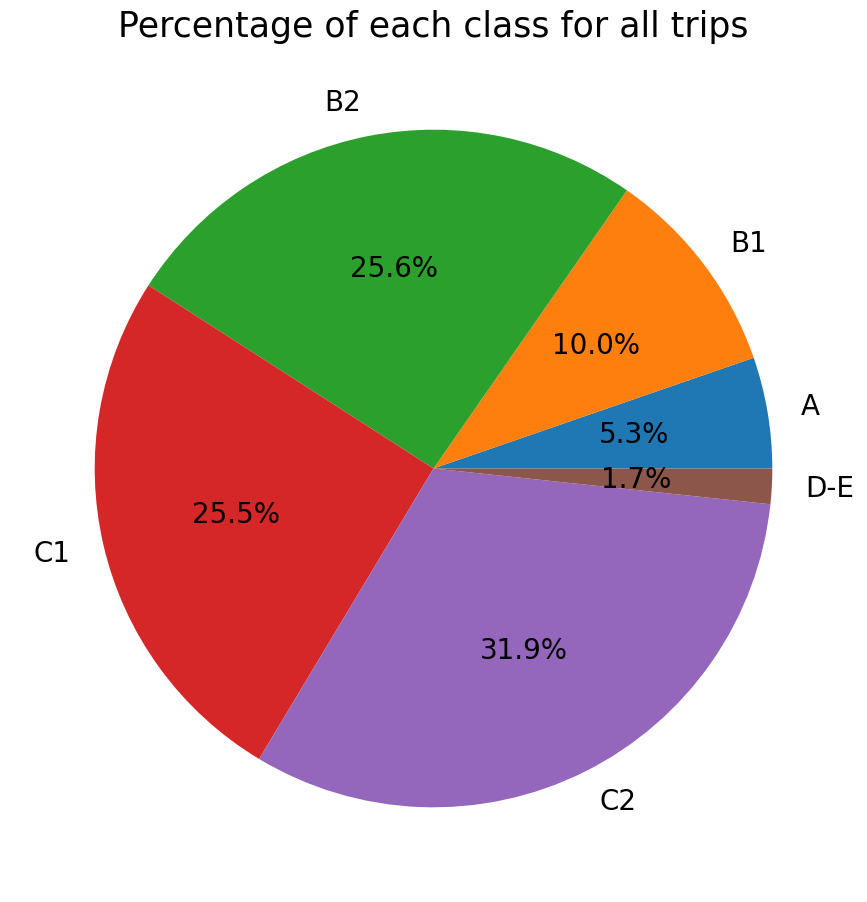

In [55]:
income_colum = 'HHBestInkG'
index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
plot_percentage_class(data, income_colum, index_map)

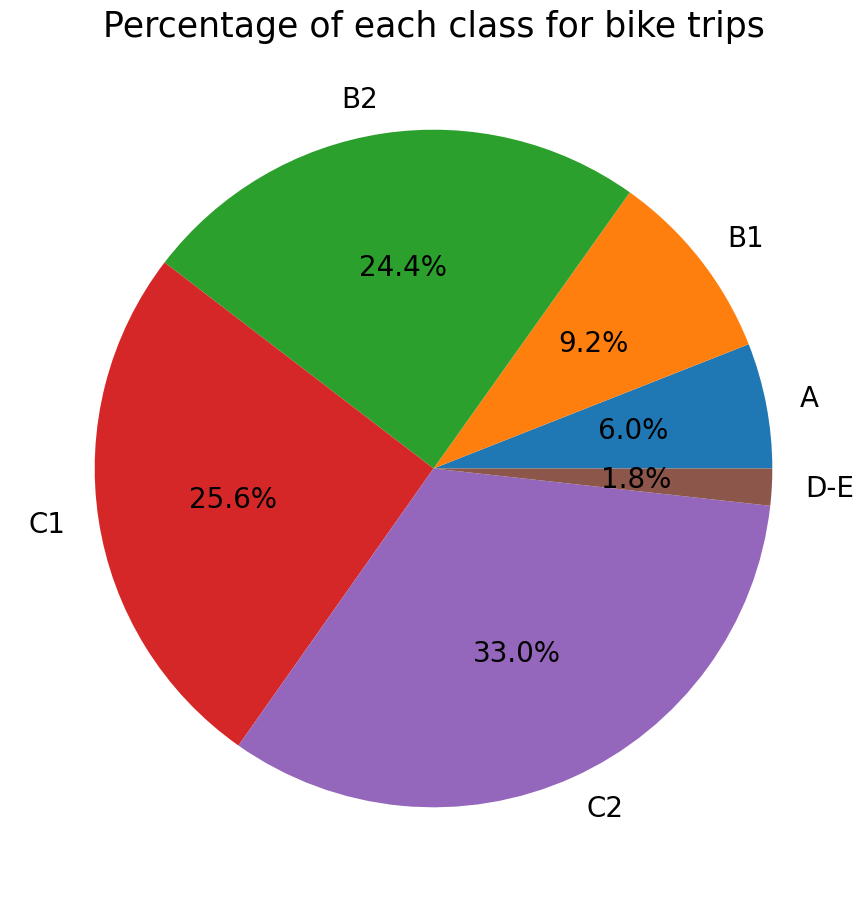

In [56]:
plot_percentage_class(bike_trips, income_colum, index_map, bike = True)

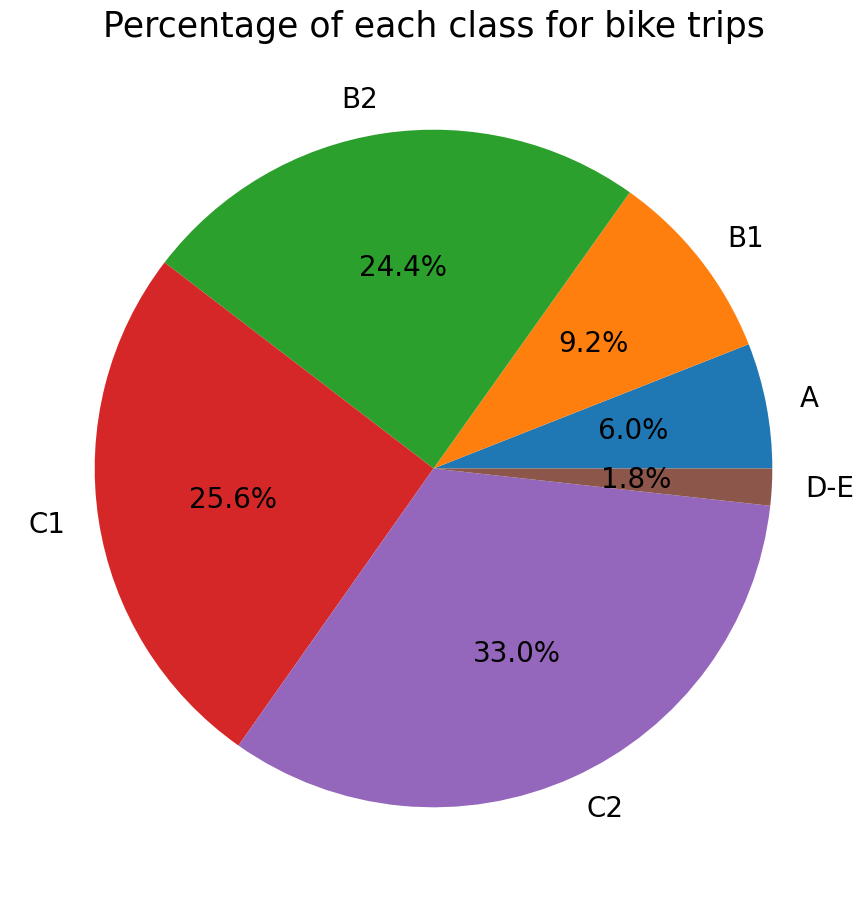

In [57]:
plot_percentage_class(bike_trips, income_colum, index_map, bike = True)

In [58]:
income_column = 'HHGestInkG'
index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
df = calculate_distribution(bike_trips, income_column, factor_expansion_person, index_map)
df

,FactorP
HHGestInkG_new,
A,7.702828
B1,14.348330
B2,29.495493
C1,23.317683
C2,23.379071
D-E,1.756595


In [72]:
import matplotlib.pyplot as plt

def plot_mode_separated_by_class(data, social_class_column, mode_column, mode_index_map, classes_index_map):

    nrow=2
    ncol=3
    classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}

    fig, axes = plt.subplots(nrow, ncol)

    fig.patch.set_facecolor('white')
    fig.set_size_inches(18.5, 11)
    fig.suptitle('Percentage of each mode of transportation, separated by class', fontsize = 25)

    count = 1
    print(social_class_column)
    percentages_social_class = calculate_distribution(data, social_class_column, factor_expansion_person, classes_index_map)

    new_variable_column = social_class_column + '_new'
    data[new_variable_column] = data[social_class_column].map(classes_index_map)

    for r in range(nrow):
        for c in range(ncol):
            social_class = classes[count]
    
            data_class = data[data[new_variable_column] == social_class]

            data_plot = calculate_distribution(data_class, mode_column, factor_expansion_trip, mode_index_map)

            colors = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'darkorchid']
                
            if count == 1:
                data_plot.plot(ax=axes[r,c], kind='pie', autopct='%1.2f%%', fontsize = 15, colors = colors, y=factor_expansion_trip)
            else:
                data_plot.plot(ax=axes[r,c],  labels = None, kind='pie', autopct='%1.2f%%', fontsize = 15, colors = colors, y=factor_expansion_trip)

            percentage_social_class = round(float(percentages_social_class.loc[social_class]),1)
            axes[r,c].set_title('Class ' + social_class +
                                ': ' + str(percentage_social_class) + '%', fontsize = 15)
                        
            axes[r,c].get_legend().remove()
            
            axes[r,c].set(ylabel=None)
            count+=1

HHGestInkG


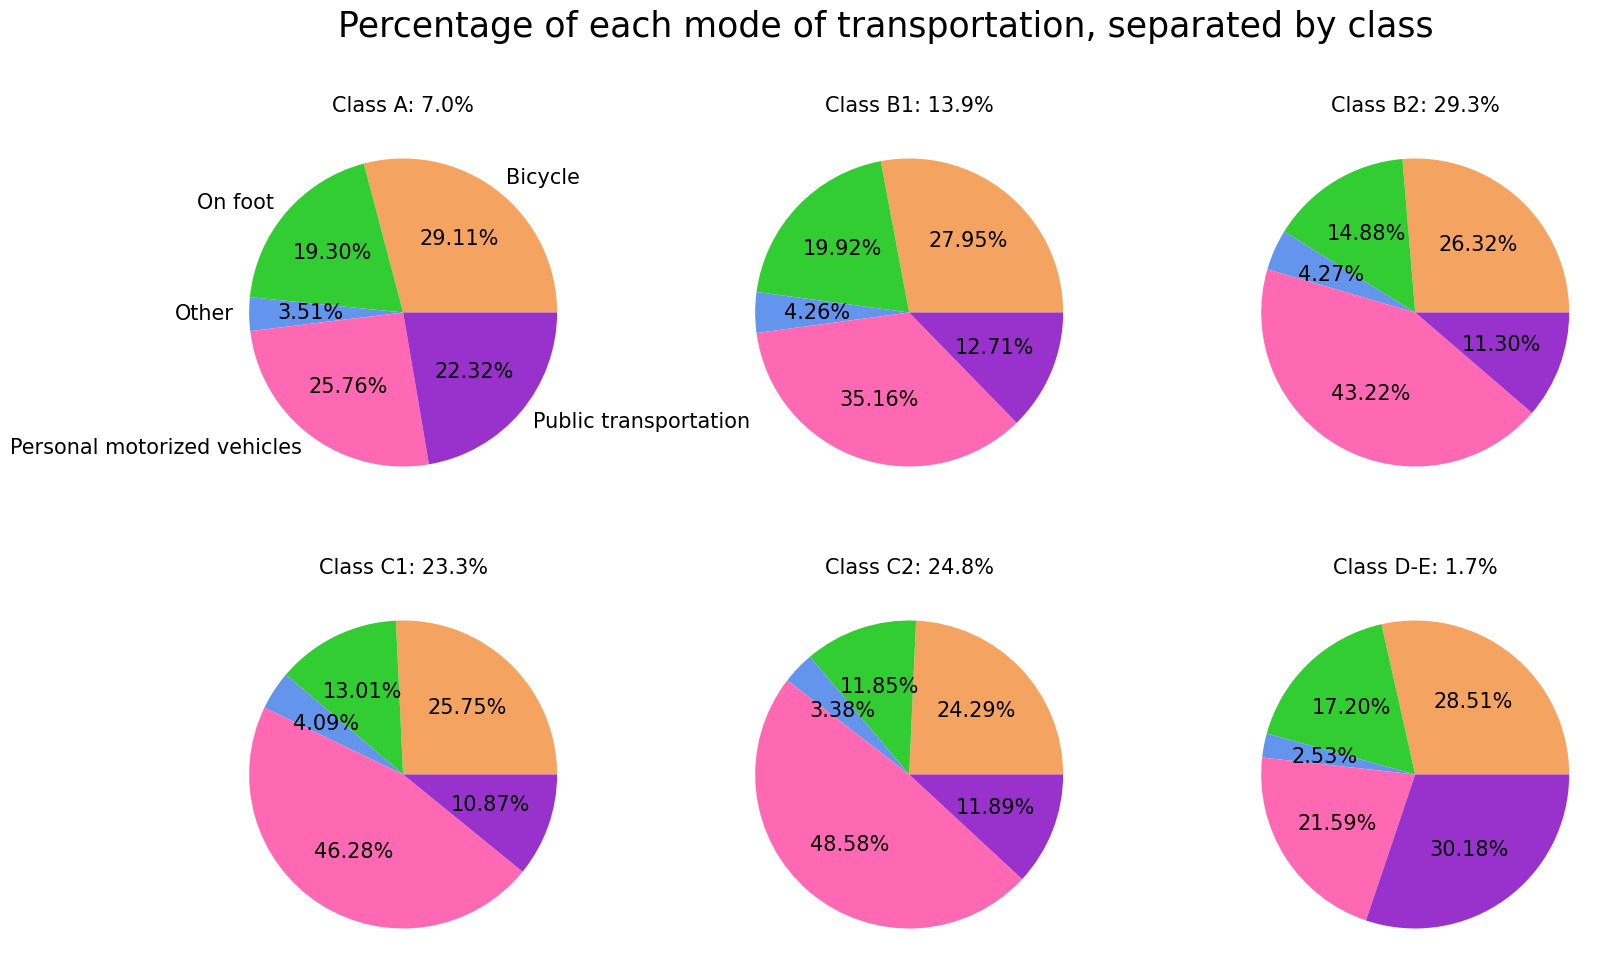

In [73]:
income_column = 'HHGestInkG'
index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
mode_index_map = {'1': 'Personal motorized vehicles', '2': 'Personal motorized vehicles', '3': 'Public transportation', '4': 'Public transportation', '5': 'Bicycle', '6': 'On foot', '7': 'Other'}
plot_mode_separated_by_class(data, income_colum, mode_column, mode_index_map, index_map)

## Duration

RReisduur - Duração da viagem na Holanda (em minutos)

RReisduurBL - Tempo de viagem ao exterior (em minutos)

In [61]:
def treat_duration_column(data, duration_column):
    new_duration_column = 'Trip duration'

    # the duration column was a string. It must be int
    data[new_duration_column] = data[duration_column].replace('#NULL!', None)
    # Int64 keeps the null values
    data[new_duration_column] = data[new_duration_column].astype('Int64')
    data[new_duration_column].fillna(int(data[new_duration_column].mean()), inplace=True)

    return data

In [62]:
# count = 1
social_class_colum = income_column
classes_index_map = {1: 'A', 2: 'B1', 3: 'B1', 4: 'B2', 5: 'B2', 6: 'B2', 7: 'C1', 8: 'C1', 9: 'C2', 10: 'C2', 11:'D-E'}
# data[new_variable_column] = data[social_class_colum].map(classes_index_map)

# classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
# social_class = classes[count]


duration_column = 'RReisduur'
new_duration_column = 'Trip duration'

# # duration column was a string. It must be int
# data[new_duration_column] = data[duration_column].replace('#NULL!', None)
# # Int64 keeps the null values
# data[new_duration_column] = data[new_duration_column].astype('Int64')
# data[new_duration_column].fillna(int(data[new_duration_column].mean()), inplace=True)

data = treat_duration_column(data, duration_column)

bike_trips = data[data[mode_column] == '5']

In [63]:
import matplotlib.pyplot as plt


def plot_duration_separated_by_class(data, duration_column, social_class_colum, classes_index_map, bike=True):
    nrow=2
    ncol=3

    classes = {0: 'NA', 1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
    # classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}

    fig, axes = plt.subplots(nrow, ncol)

    fig.patch.set_facecolor('white')
    fig.set_size_inches(18.5, 11)
    if bike:
        fig.suptitle('Duration of bicycle trips, separated by class', fontsize = 25)
    else:
        fig.suptitle('Duration of all trips, separated by class', fontsize = 25)

    new_variable_column = social_class_colum + '_new'
    data[new_variable_column] = data[social_class_colum].map(classes_index_map)
    percentages_social_class = calculate_distribution(data, social_class_colum, factor_expansion_person, classes_index_map)

    count = 1

    for r in range(nrow):
        for c in range(ncol):

            social_class = classes[count]
    
            data_class = data[data[new_variable_column] == social_class]

            data_class.boxplot(ax=axes[r,c],column=[duration_column], fontsize=18)
            
            percentage_social_class = round(float(percentages_social_class.loc[social_class]),1)
            axes[r,c].set_title('Class ' + social_class + ': ' + str(percentage_social_class) + '%', fontsize = 20)
            axes[r,c].set(ylabel=None)
            if bike:
                axes[r,c].set_ylim(0,120)
            else:
                axes[r,c].set_ylim(0,120)
            count+=1

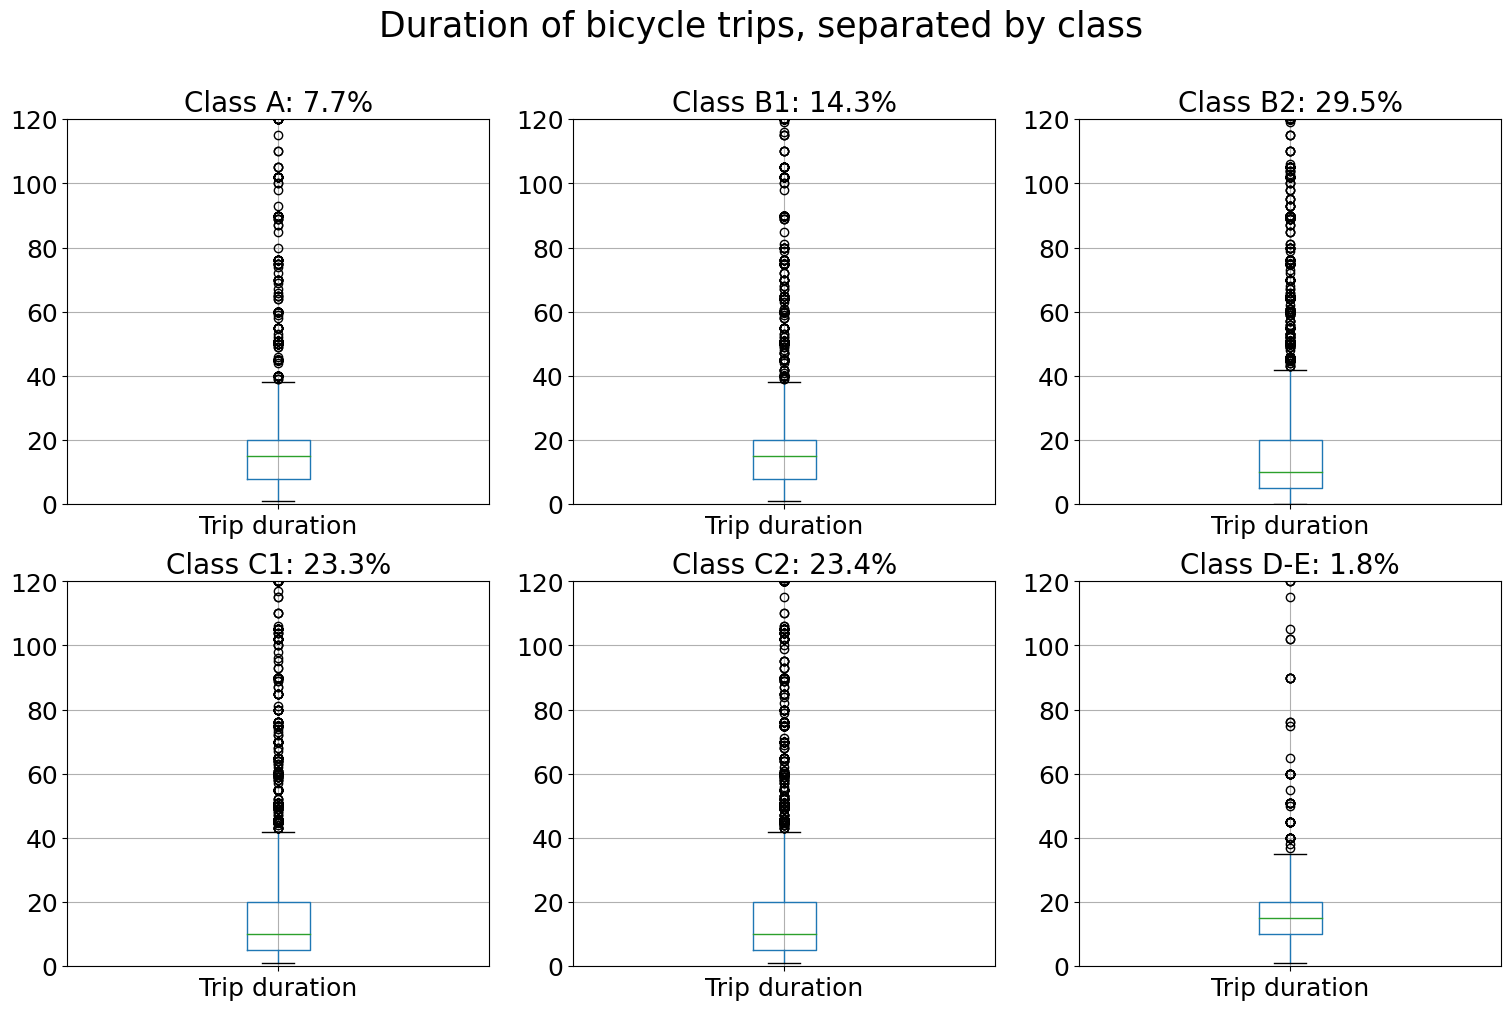

In [64]:
plot_duration_separated_by_class(bike_trips, new_duration_column, social_class_colum, classes_index_map, bike=True)

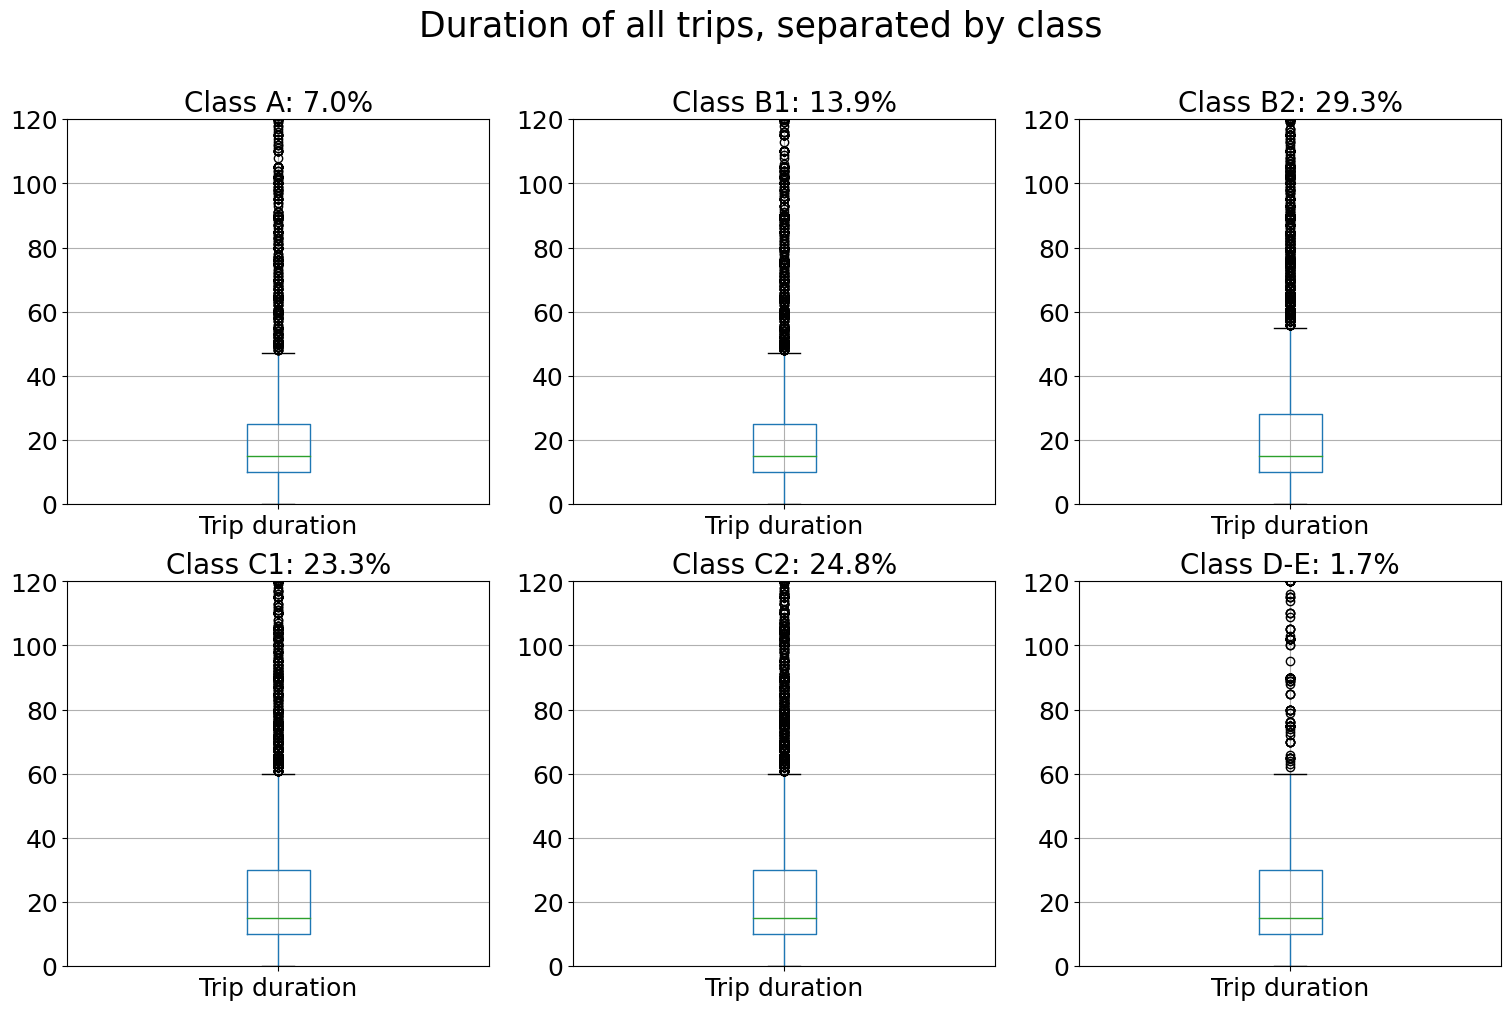

In [65]:
plot_duration_separated_by_class(data, new_duration_column, social_class_colum, classes_index_map, bike=False)

In [66]:
bike_trips[new_duration_column].mean()

20.071421569588487

In [67]:
len(data_sp[data_sp['QT_BICICLE'] > 1])/len(data_sp)

NameError: name 'data_sp' is not defined

In [ ]:
len(data_sp[data_sp['QT_BICICLE'] >= 1])/len(data_sp)

0.3629813605452973

In [ ]:
data_sp['HAS_BIKE'] = data_sp['QT_BICICLE'] >= 1

/tmp/ipykernel_9360/2513035500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp['HAS_BIKE'] = data_sp['QT_BICICLE'] >= 1


In [ ]:
len(data_sp[data_sp['HAS_BIKE']])/len(data_sp)

0.3629813605452973

In [ ]:
def calculate_bike_distribution(df):
    df_grouped  = df.groupby('QT_BICICLE')['FE_PESS'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    # index_map = {1: 'Masculino', 2: 'Feminino'}
    # df_percentage = df_percentage[df_percentage.index.isin([1,2])]
    # df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [ ]:
df = calculate_bike_distribution(data_sp)
df

,FE_PESS
QT_BICICLE,
0.0,66.593744
1.0,22.279214
2.0,7.804202
3.0,2.195246
4.0,0.837713
5.0,0.191550
6.0,0.087483
7.0,0.001707
8.0,0.004086


<AxesSubplot:xlabel='QT_BICICLE'>

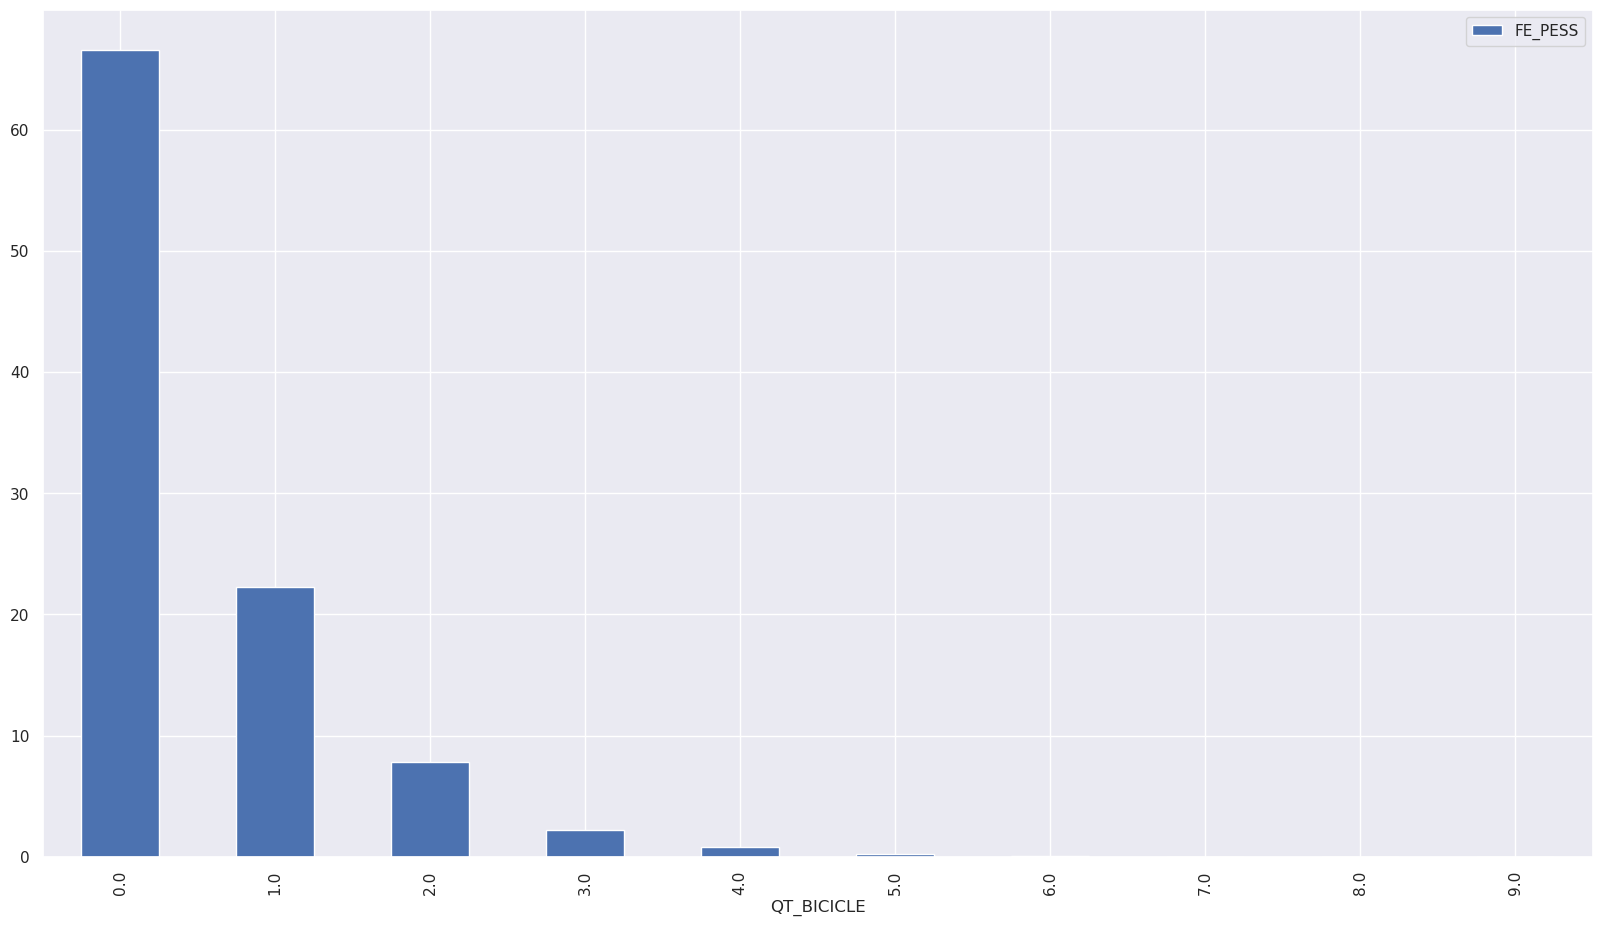

In [ ]:
df.plot(kind='bar')

In [ ]:
calculate_bike_distribution(data_sp)

,FE_PESS
QT_BICICLE,
0.0,66.593744
1.0,22.279214
2.0,7.804202
3.0,2.195246
4.0,0.837713
5.0,0.191550
6.0,0.087483
7.0,0.001707
8.0,0.004086


In [ ]:
100 - 66.593744

33.406256

In [ ]:
# 1/3 dos domiciclios tem bicicleta, mas menos de um por cento das viagens é feita de bicicleta

In [ ]:
def calculate_class_distribution(df):
    df_grouped  = df.groupby('CRITERIOBR')['FE_PESS'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    index_map = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
    df_percentage = df_percentage[df_percentage.index.isin([1,2,3,4,5,6])]
    df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [ ]:
df = calculate_class_distribution(data_sp)
df

,FE_PESS
CRITERIOBR,
A,8.770746
B1,10.199003
B2,29.602694
C1,26.080902
C2,17.884719
D-E,5.252072


In [ ]:
data_sp['CRITERIOBR'].value_counts(normalize=True).sort_index()*100

0.0     2.447966
1.0    18.667227
2.0    14.678273
3.0    27.998064
4.0    19.459146
5.0    12.753228
6.0     3.996096
Name: CRITERIOBR, dtype: float64

In [ ]:
calculate_class_distribution(bike_trips)

,FE_PESS
CRITERIOBR,
A,8.562807
B1,7.025999
B2,19.970185
C1,28.856074
C2,25.385490
D-E,9.849039


In [ ]:
bike_trips['CRITERIOBR'].value_counts(normalize=True).sort_index()*100

0.0     0.850077
1.0    16.151468
2.0    11.051005
3.0    22.874807
4.0    21.483771
5.0    19.860896
6.0     7.727975
Name: CRITERIOBR, dtype: float64

In [ ]:
df = calculate_class_distribution(data_sp)
df['FE_PESS'].sum()

97.79013588607981

In [ ]:
len(data_sp[data_sp['MOTIVO_O'] == 7])/len(data_sp)

0.024432048118200645

In [ ]:
len(bike_trips[bike_trips['MOTIVO_O'] == 7])/len(bike_trips)

0.03632148377125193

In [ ]:
len(data_sp[data_sp['MOTIVO_D'] == 7])/len(data_sp)

0.0251223982923752

In [ ]:
len(bike_trips[bike_trips['MOTIVO_D'] == 7])/len(bike_trips)

0.03709428129829984

In [ ]:
bike_trips['TP_ESBICI'].value_counts(normalize=True)

3.0    0.785935
1.0    0.073416
4.0    0.068006
8.0    0.054869
6.0    0.007728
7.0    0.003864
5.0    0.003091
2.0    0.003091
Name: TP_ESBICI, dtype: float64

In [ ]:
def calculate_parking_distribution(df):
    df_grouped  = df.groupby('TP_ESBICI')['FE_VIA'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    index_map = {1: 'Bicicletário gratuito', 2:'Bicicletário pago', 3:'Local privado',
                 4: 'Rua/Local público', 5:'Guardador de rua', 6:'Estação de bicicleta',
                 7: 'Paraciclo público', 8: 'Outros'}
    df_percentage = df_percentage[df_percentage.index.isin([1,2,3,4,5,6,7,8])]
    df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [ ]:
calculate_parking_distribution(bike_trips)

,FE_VIA
TP_ESBICI,
Bicicletário gratuito,7.438540
Bicicletário pago,0.209821
Local privado,79.930646
Rua/Local público,7.037284
Guardador de rua,0.182065
Estação de bicicleta,0.368712
Paraciclo público,0.036866
Outros,4.796065
